1. Импорт Необходимых Библиотек

In [80]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import geopandas as gpd
from shapely.geometry import Point, Polygon
import osmnx as ox


from h3 import h3
import shapely


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb


import folium


from tqdm import tqdm
tqdm.pandas()

%matplotlib inline
sns.set(style="whitegrid")


2. Загрузка и Первичный Анализ Данных

In [81]:
import os

path = "C:/Users/acbul/Downloads/magnit_ds/"

magnit_df = pd.read_csv(os.path.join(path, "magnit_nft.csv"), delimiter=',')
)
pyaterochka_df = pd.read_csv(os.path.join(path, "pyaterochka_nft.csv"), delimiter=',')

novostroyka_df = pd.read_csv(os.path.join(path, "novostroyka_nft.csv"), delimiter=',')

print("Магазины Магнит:")
display(magnit_df.head())

print("\nКонкуренты (Пятёрочка):")
display(pyaterochka_df.head())

print("\nНовостройки:")
display(novostroyka_df.head())


Магазины Магнит:


,Наименование,Описание,Рубрики,Адрес,Комментарий к адресу,Почтовый индекс,Микрорайон,Район,Город,Округ,...,Веб-сайт 1,Веб-сайт 2,Twitter,ВКонтакте,Telegram,YouTube,Широта,Долгота,2GIS URL,Тип
0,Магнит,супермаркет,Супермаркеты,"17-й микрорайон, 14",NaN,628306.0,NaN,NaN,Нефтеюганск,Нефтеюганск городской округ,...,http://magnit.ru/promo-catalog,http://my.magnit.ru/?appmetrica_tracking_id=67...,NaN,https://vk.com/magnitretail,https://t.me/magnit_retail,https://youtube.com/channel/UCoWX1GhHlSJGwKpCE...,61.073713,72.609192,https://2gis.com/firm/70000001075570487,branch
1,Магнит,супермаркет,Супермаркеты,"13-й микрорайон, 70",1 этаж,628311.0,13-й м-н,NaN,Нефтеюганск,Нефтеюганск городской округ,...,http://magnit.ru/promo-catalog,http://my.magnit.ru/?appmetrica_tracking_id=67...,NaN,https://vk.com/magnitretail,https://t.me/magnit_retail,https://youtube.com/channel/UCoWX1GhHlSJGwKpCE...,61.077502,72.623369,https://2gis.com/firm/70000001007021494,branch
2,Магнит,супермаркет,Супермаркеты,"15-й микрорайон, 8",NaN,628306.0,15-й м-н,NaN,Нефтеюганск,Нефтеюганск городской округ,...,http://magnit.ru/promo-catalog,http://my.magnit.ru/?appmetrica_tracking_id=67...,NaN,https://vk.com/magnitretail,https://t.me/magnit_retail,https://youtube.com/channel/UCoWX1GhHlSJGwKpCE...,61.076300,72.618680,https://2gis.com/firm/70000001022179142,branch
3,Магнит,супермаркет,Супермаркеты,"микрорайон 16а, 91",1 этаж,628310.0,16а м-н,NaN,Нефтеюганск,Нефтеюганск городской округ,...,http://magnit.ru/promo-catalog,http://my.magnit.ru/?appmetrica_tracking_id=67...,NaN,https://vk.com/magnitretail,https://t.me/magnit_retail,https://youtube.com/channel/UCoWX1GhHlSJGwKpCE...,61.080852,72.611938,https://2gis.com/firm/70000001024729897,branch
4,Магнит,супермаркет,Супермаркеты,"17-й микрорайон, 1",NaN,628305.0,NaN,NaN,Нефтеюганск,Нефтеюганск городской округ,...,http://magnit.ru/promo-catalog,http://my.magnit.ru/?appmetrica_tracking_id=67...,NaN,https://vk.com/magnitretail,https://t.me/magnit_retail,https://youtube.com/channel/UCoWX1GhHlSJGwKpCE...,61.070345,72.616405,https://2gis.com/firm/70000001088280797,branch



Конкуренты (Пятёрочка):


,Наименование,Описание,Рубрики,Адрес,Комментарий к адресу,Почтовый индекс,Микрорайон,Район,Город,Округ,...,Рейтинг,Количество отзывов,Телефон,Веб-сайт 1,Веб-сайт 2,ВКонтакте,Широта,Долгота,2GIS URL,Тип
0,Пятёрочка,супермаркет,Супермаркеты,"улица Мамонтовская, 5",NaN,628311,NaN,NaN,Нефтеюганск,Нефтеюганск городской округ,...,4.5,21.0,88005555505 (бесплатная горячая линия: круглос...,http://5ka.ru/catalog/?utm_source=2GIS&utm_med...,http://t.me/tspyaterochka,https://vk.com/club19098821,61.076939,72.631858,https://2gis.com/firm/70000001055459768,branch
1,Пятёрочка,супермаркет,Супермаркеты,"16-й микрорайон, 11",1 этаж,628310,16-й м-н,NaN,Нефтеюганск,Нефтеюганск городской округ,...,2.7,23.0,88005555505 (бесплатная горячая линия: круглос...,http://5ka.ru/catalog/?utm_source=2GIS&utm_med...,http://t.me/tspyaterochka,https://vk.com/club19098821,61.082865,72.621815,https://2gis.com/firm/70000001037206633,branch
2,Пятёрочка,супермаркет,Супермаркеты,"13-й микрорайон, 69",NaN,628311,13-й м-н,NaN,Нефтеюганск,Нефтеюганск городской округ,...,4.6,15.0,88005555505 (бесплатная горячая линия: круглос...,http://5ka.ru/catalog/?utm_source=2GIS&utm_med...,http://t.me/tspyaterochka,https://vk.com/club19098821,61.080335,72.628508,https://2gis.com/firm/5489290326838102,branch
3,Пятёрочка,супермаркет,Супермаркеты,"15-й микрорайон, 20",1 этаж,628306,15-й м-н,NaN,Нефтеюганск,Нефтеюганск городской округ,...,2.8,12.0,88005555505 (бесплатная горячая линия: круглос...,http://5ka.ru/catalog/?utm_source=2GIS&utm_med...,http://t.me/tspyaterochka,https://vk.com/club19098821,61.072045,72.615266,https://2gis.com/firm/70000001025945061,branch
4,Пятёрочка,супермаркет,Супермаркеты,"4-й микрорайон, 58",NaN,628301,4-й м-н,NaN,Нефтеюганск,Нефтеюганск городской округ,...,4.4,34.0,88005555505 (бесплатная горячая линия: круглос...,http://5ka.ru/catalog/?utm_source=2GIS&utm_med...,http://t.me/tspyaterochka,https://vk.com/club19098821,61.091164,72.607632,https://2gis.com/firm/70000001028738042,branch



Новостройки:


,Наименование,Описание,Рубрики,Адрес,Комментарий к адресу,Почтовый индекс,Микрорайон,Район,Город,Округ,...,Часы работы,Часовой пояс,Рейтинг,Количество отзывов,Телефон,Веб-сайт,Широта,Долгота,2GIS URL,Тип
0,Прибрежный парк,жилой комплекс,Новостройки,"микрорайон 9а, к4.2",NaN,628303,9а м-н,NaN,Нефтеюганск,Нефтеюганск городской округ,...,NaN,+05:00,5.0,27.0,83463700095,http://riverside-park.ru,61.099765,72.626375,https://2gis.com/firm/70000001075766810,branch
1,Заречный,жилой комплекс,Новостройки,"17-й микрорайон, 11/2",дом сдан,628306,NaN,NaN,Нефтеюганск,Нефтеюганск городской округ,...,NaN,+05:00,5.0,13.0,83462600190 (офис продаж: пн-пт 9:00-20:00; сб...,http://www.sibpromstroy.ru/projects/zhk-zarechnyy,61.073193,72.606106,https://2gis.com/firm/70000001061527562,branch
2,Заречный,жилой комплекс,Новостройки,"17-й микрорайон, 11/1",дом сдан,628306,NaN,NaN,Нефтеюганск,Нефтеюганск городской округ,...,NaN,+05:00,5.0,7.0,83462600190 (офис продаж: пн-пт 9:00-20:00; сб...,http://www.sibpromstroy.ru/projects/zhk-zarechnyy,61.073863,72.607782,https://2gis.com/firm/70000001061585216,branch
3,ДСК-1,офис продаж,Новостройки,"микрорайон 16а, 50",NaN,628310,16а м-н,NaN,Нефтеюганск,Нефтеюганск городской округ,...,Вт: 09:30-18:30; Ср: 09:30-18:30; Чт: 09:30-18...,+05:00,1.0,1.0,83463700095,http://riverside-park.ru,61.081004,72.618444,https://2gis.com/firm/70000001080574405,branch
4,Заречный,жилой комплекс,Новостройки,"17-й микрорайон, 9",NaN,628305,NaN,NaN,Нефтеюганск,Нефтеюганск городской округ,...,NaN,+05:00,5.0,1.0,83462600190 (офис продаж: пн-пт 9:00-20:00; сб...,http://www.sibpromstroy.ru/projects/zhk-zarechnyy,61.071576,72.605623,https://2gis.com/firm/70000001076587248,branch


In [82]:
# Путь к shapefile с плотностью населения
pop_shp_path = os.path.join(path, "nft_pop_dens", "nft_h3.shp")


pop_gdf = gpd.read_file(pop_shp_path)


print("Данные о плотности населения:")
display(pop_gdf.head())


Данные о плотности населения:


,fid,h3,population,geometry
0,907320.0,880b06bb6bfffff,2.0,"POLYGON ((8064029.865 8656038.229, 8064961.233..."
1,907321.0,880b06bb69fffff,162.0,"POLYGON ((8063248.457 8654232.634, 8064179.567..."
2,907323.0,880b06bb3bfffff,4.0,"POLYGON ((8069172.932 8663506.523, 8070105.516..."
3,907324.0,880b06bb37fffff,373.0,"POLYGON ((8072417.481 8662186.150, 8073350.174..."
4,907325.0,880b06bb2dfffff,11.0,"POLYGON ((8069284.541 8654964.527, 8070216.203..."


Проверка на пропущенные значения

In [83]:
print("\nПропущенные значения в магазинах Магнит:")
print(magnit_df.isnull().sum())


Пропущенные значения в магазинах Магнит:
Наименование              0
Описание                  0
Рубрики                   0
Адрес                     0
Комментарий к адресу     67
Почтовый индекс           3
Микрорайон               42
Район                    51
Город                    16
Округ                     0
Регион                    0
Страна                    0
Часы работы               0
Часовой пояс              0
Рейтинг                   3
Количество отзывов        3
Телефон 1                 1
Телефон 2               125
E-mail                   18
Веб-сайт 1                1
Веб-сайт 2               17
Twitter                 123
ВКонтакте                 1
Telegram                  2
YouTube                  17
Широта                    0
Долгота                   0
2GIS URL                  0
Тип                       0
dtype: int64


In [84]:
print("\nПропущенные значения в конкурентах (Пятёрочка):")
print(pyaterochka_df.isnull().sum())


Пропущенные значения в конкурентах (Пятёрочка):
Наименование             0
Описание                 2
Рубрики                  0
Адрес                    0
Комментарий к адресу    46
Почтовый индекс          0
Микрорайон              28
Район                   32
Город                   10
Округ                    0
Регион                   0
Страна                   0
Часы работы              0
Часовой пояс             0
Рейтинг                  1
Количество отзывов       1
Телефон                  0
Веб-сайт 1               0
Веб-сайт 2               5
ВКонтакте                8
Широта                   0
Долгота                  0
2GIS URL                 0
Тип                      0
dtype: int64


In [85]:
print("\nПропущенные значения в новостройках:")
print(novostroyka_df.isnull().sum())


Пропущенные значения в новостройках:
Наименование             0
Описание                 0
Рубрики                  0
Адрес                    3
Комментарий к адресу    10
Почтовый индекс          0
Микрорайон               4
Район                   12
Город                    0
Округ                    0
Регион                   0
Страна                   0
Часы работы             11
Часовой пояс             0
Рейтинг                  3
Количество отзывов       3
Телефон                  1
Веб-сайт                 3
Широта                   0
Долгота                  0
2GIS URL                 0
Тип                      0
dtype: int64


In [86]:
print("\nПропущенные значения в плотности населения:")
print(pop_gdf.isnull().sum())


Пропущенные значения в плотности населения:
fid           0
h3            0
population    0
geometry      0
dtype: int64


3. Предобработка Данных
Удалим строки с пропущенными координатами и заполним другие пропуски. Выберем город Нефтеюганск, тк в датафрейме оказались данные с других городов.

In [87]:
magnit_df = magnit_df[magnit_df['Город'] == 'Нефтеюганск']
pyaterochka_df = pyaterochka_df[pyaterochka_df['Город'] == 'Нефтеюганск']
novostroyka_df = novostroyka_df[novostroyka_df['Город'] == 'Нефтеюганск']


magnit_df = magnit_df.dropna(subset=['Широта', 'Долгота'])
pyaterochka_df = pyaterochka_df.dropna(subset=['Широта', 'Долгота'])
novostroyka_df = novostroyka_df.dropna(subset=['Широта', 'Долгота'])


magnit_df['Рейтинг'] = magnit_df['Рейтинг'].fillna(magnit_df['Рейтинг'].mean())
pyaterochka_df['Рейтинг'] = pyaterochka_df['Рейтинг'].fillna(pyaterochka_df['Рейтинг'].mean())


magnit_df['Количество отзывов'] = magnit_df['Количество отзывов'].fillna(magnit_df['Количество отзывов'].mean())
pyaterochka_df['Количество отзывов'] = pyaterochka_df['Количество отзывов'].fillna(pyaterochka_df['Количество отзывов'].mean())


Преобразование Координат в Геоформат с Определением UTM Зоны

In [88]:
def create_geodataframe(df, lat_col='Широта', lon_col='Долгота'):
    """
    Преобразует DataFrame с координатами в GeoDataFrame.
    
    Parameters:
    df (pd.DataFrame): Исходный DataFrame.
    lat_col (str): Название столбца с широтой.
    lon_col (str): Название столбца с долготой.
    
    Returns:
    gpd.GeoDataFrame: GeoDataFrame с геометрией точек.
    """
    geometry = [Point(xy) for xy in zip(df[lon_col], df[lat_col])]
    gdf = gpd.GeoDataFrame(df, geometry=geometry)
    gdf.set_crs(epsg=4326, inplace=True)  # WGS84
    return gdf


magnit_gdf = create_geodataframe(magnit_df)

pyaterochka_gdf = create_geodataframe(pyaterochka_df)

novostroyka_gdf = create_geodataframe(novostroyka_df)

def determine_utm_zone(gdf):
    """
    Определяет UTM зону для GeoDataFrame.
    
    Parameters:
    gdf (gpd.GeoDataFrame): GeoDataFrame с CRS WGS84.
    
    Returns:
    str: Код CRS для UTM зоны.
    """
    # Берём среднюю долготу
    avg_lon = gdf.geometry.x.mean()
    # Вычисляем UTM зону
    utm_zone = int((avg_lon + 180) / 6) + 1
    # Определяем северную или южную полушарие
    avg_lat = gdf.geometry.y.mean()
    hemisphere = 'north' if avg_lat >= 0 else 'south'
    # Создаём строку EPSG кода
    epsg_code = f"326{utm_zone:02d}" if hemisphere == 'north' else f"327{utm_zone:02d}"
    return epsg_code


utm_crs = determine_utm_zone(magnit_gdf)
print(f"Выбранная UTM зона: {utm_crs}")


magnit_gdf_utm = magnit_gdf.to_crs(utm_crs)
pyaterochka_gdf_utm = pyaterochka_gdf.to_crs(utm_crs)
novostroyka_gdf_utm = novostroyka_gdf.to_crs(utm_crs)


print("\nCRS Магнит (UTM):", magnit_gdf_utm.crs)
print("CRS Пятёрочка (UTM):", pyaterochka_gdf_utm.crs)
print("CRS Новостройки (UTM):", novostroyka_gdf_utm.crs)


Выбранная UTM зона: 32643

CRS Магнит (UTM): EPSG:32643
CRS Пятёрочка (UTM): EPSG:32643
CRS Новостройки (UTM): EPSG:32643


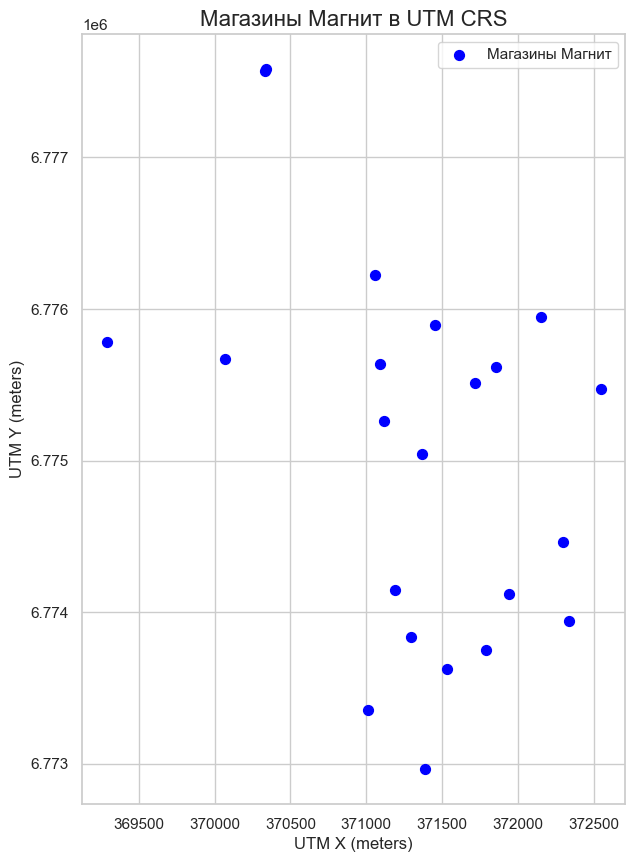

In [89]:
fig, ax = plt.subplots(figsize=(10, 10))
magnit_gdf_utm.plot(ax=ax, color='blue', markersize=50, label='Магазины Магнит')
plt.title('Магазины Магнит в UTM CRS', fontsize=16)
plt.xlabel('UTM X (meters)')
plt.ylabel('UTM Y (meters)')
plt.legend()
plt.show()


4. Получение и Обработка OSM Данных

In [90]:
import time
import pandas as pd
import osmnx as ox
import geopandas as gpd
from shapely.geometry import Point


def get_osm_tags_with_retry(lat, lon, radius=500, retries=3, delay=5):
    """
    Получает OSM-теги вокруг заданной точки с повторными попытками в случае ошибок.

    Parameters:
    lat (float): Широта точки.
    lon (float): Долгота точки.
    radius (int): Радиус поиска в метрах.
    retries (int): Количество повторных попыток.
    delay (int): Задержка между попытками в секундах.

    Returns:
    gpd.GeoDataFrame: GeoDataFrame с OSM-тегами.
    """
    for attempt in range(retries):
        try:
            tags = ox.features_from_point((lat, lon), tags={'building': True, 'highway': True, 'construction': True}, dist=radius)
            return tags
        except Exception as e:
            print(f"Попытка {attempt+1}/{retries} не удалась для ({lat}, {lon}): {e}")
            time.sleep(delay)
    print(f"Не удалось получить OSM данные для ({lat}, {lon}) после {retries} попыток.")
    return gpd.GeoDataFrame()

def process_osm_tags(tags, utm_crs):
    """
    Обрабатывает OSM-теги и подсчитывает количество жилых зданий и длину дорог.

    Parameters:
    tags (gpd.GeoDataFrame): GeoDataFrame с OSM-тегами.
    utm_crs (str): Код проекции UTM.

    Returns:
    tuple: (количество жилых зданий, длина автомобильных дорог в метрах, длина пешеходных дорог в метрах)
    """
    if tags.empty:
        return 0, 0, 0

    # теги жилых зданий
    residential = tags[tags['building'].isin(['residential', 'apartments', 'house'])]
    residential_count = residential.shape[0]

    # теги транспортных объектов
    highways = tags[tags['highway'].notnull()]

    # преобразование в UTM для измерения длины (тк wgs84 не метричная система)
    highways = highways.to_crs(utm_crs)

    # разделение на автомобильные и пешеходные дороги по тегам
    auto_highways = highways[highways['highway'].isin(['motorway', 'trunk', 'primary', 'secondary', 'tertiary', 'unclassified', 'residential'])]
    pedestrian_highways = highways[highways['highway'].isin(['footway', 'pedestrian', 'path'])]

    # подсчёт длины
    auto_length = auto_highways.length.sum()
    pedestrian_length = pedestrian_highways.length.sum()

    return residential_count, auto_length, pedestrian_length

# Применение функций к каждому магазину Магнит с учётом UTM CRS
magnit_gdf_utm[['Residential_Count', 'Auto_Highway_Length', 'Pedestrian_Highway_Length']] = magnit_gdf.progress_apply(
    lambda row: pd.Series(
        process_osm_tags(get_osm_tags_with_retry(row['Широта'], row['Долгота'], radius=500), utm_crs)
    ),
    axis=1
)

# Просмотр обновлённого DataFrame
display(magnit_gdf.head())


100%|██████████| 22/22 [00:03<00:00,  6.62it/s]


,Наименование,Описание,Рубрики,Адрес,Комментарий к адресу,Почтовый индекс,Микрорайон,Район,Город,Округ,...,Веб-сайт 2,Twitter,ВКонтакте,Telegram,YouTube,Широта,Долгота,2GIS URL,Тип,geometry
0,Магнит,супермаркет,Супермаркеты,"17-й микрорайон, 14",NaN,628306.0,NaN,NaN,Нефтеюганск,Нефтеюганск городской округ,...,http://my.magnit.ru/?appmetrica_tracking_id=67...,NaN,https://vk.com/magnitretail,https://t.me/magnit_retail,https://youtube.com/channel/UCoWX1GhHlSJGwKpCE...,61.073713,72.609192,https://2gis.com/firm/70000001075570487,branch,POINT (72.60919 61.07371)
1,Магнит,супермаркет,Супермаркеты,"13-й микрорайон, 70",1 этаж,628311.0,13-й м-н,NaN,Нефтеюганск,Нефтеюганск городской округ,...,http://my.magnit.ru/?appmetrica_tracking_id=67...,NaN,https://vk.com/magnitretail,https://t.me/magnit_retail,https://youtube.com/channel/UCoWX1GhHlSJGwKpCE...,61.077502,72.623369,https://2gis.com/firm/70000001007021494,branch,POINT (72.62337 61.07750)
2,Магнит,супермаркет,Супермаркеты,"15-й микрорайон, 8",NaN,628306.0,15-й м-н,NaN,Нефтеюганск,Нефтеюганск городской округ,...,http://my.magnit.ru/?appmetrica_tracking_id=67...,NaN,https://vk.com/magnitretail,https://t.me/magnit_retail,https://youtube.com/channel/UCoWX1GhHlSJGwKpCE...,61.076300,72.618680,https://2gis.com/firm/70000001022179142,branch,POINT (72.61868 61.07630)
3,Магнит,супермаркет,Супермаркеты,"микрорайон 16а, 91",1 этаж,628310.0,16а м-н,NaN,Нефтеюганск,Нефтеюганск городской округ,...,http://my.magnit.ru/?appmetrica_tracking_id=67...,NaN,https://vk.com/magnitretail,https://t.me/magnit_retail,https://youtube.com/channel/UCoWX1GhHlSJGwKpCE...,61.080852,72.611938,https://2gis.com/firm/70000001024729897,branch,POINT (72.61194 61.08085)
4,Магнит,супермаркет,Супермаркеты,"17-й микрорайон, 1",NaN,628305.0,NaN,NaN,Нефтеюганск,Нефтеюганск городской округ,...,http://my.magnit.ru/?appmetrica_tracking_id=67...,NaN,https://vk.com/magnitretail,https://t.me/magnit_retail,https://youtube.com/channel/UCoWX1GhHlSJGwKpCE...,61.070345,72.616405,https://2gis.com/firm/70000001088280797,branch,POINT (72.61641 61.07035)


5. Интеграция Данных о Плотности Населения

In [91]:
import geopandas as gpd
from shapely.geometry import Point
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


utm_crs = "EPSG:32643"  # ютм зона 43N для Нефтеюганска

pop_shp_path = "C:/Users/acbul/Downloads/magnit_ds/nft_pop_dens/nft_h3.shp"
pop_gdf = gpd.read_file(pop_shp_path)

print("Данные о плотности населения:")
display(pop_gdf.head())

print("CRS Плотности населения:", pop_gdf.crs)

if pop_gdf.crs != utm_crs:
    pop_gdf = pop_gdf.to_crs(utm_crs)
    print(f"Преобразование плотности населения в {utm_crs}")
else:
    print("Данные о плотности населения уже в UTM CRS")


Данные о плотности населения:


,fid,h3,population,geometry
0,907320.0,880b06bb6bfffff,2.0,"POLYGON ((8064029.865 8656038.229, 8064961.233..."
1,907321.0,880b06bb69fffff,162.0,"POLYGON ((8063248.457 8654232.634, 8064179.567..."
2,907323.0,880b06bb3bfffff,4.0,"POLYGON ((8069172.932 8663506.523, 8070105.516..."
3,907324.0,880b06bb37fffff,373.0,"POLYGON ((8072417.481 8662186.150, 8073350.174..."
4,907325.0,880b06bb2dfffff,11.0,"POLYGON ((8069284.541 8654964.527, 8070216.203..."


CRS Плотности населения: EPSG:3857
Преобразование плотности населения в EPSG:32643


In [92]:
print("CRS Магнит (UTM):", magnit_gdf_utm.crs)

if magnit_gdf_utm.crs != utm_crs:
    magnit_gdf_utm = magnit_gdf_utm.to_crs(utm_crs)
    print(f"Преобразование магазинов Магнит в {utm_crs}")
else:
    print("Магазины Магнит уже в UTM CRS")


CRS Магнит (UTM): EPSG:32643
Магазины Магнит уже в UTM CRS


In [93]:
magnit_gdf_utm['buffer_id'] = magnit_gdf_utm.index  

magnit_gdf_utm['buffer_500m'] = magnit_gdf_utm.geometry.buffer(500)

buffers_gdf = magnit_gdf_utm[['buffer_id', 'buffer_500m']].copy()
buffers_gdf = buffers_gdf.set_geometry('buffer_500m')
buffers_gdf.set_crs(utm_crs, inplace=True)

print("Буферы 500 метров вокруг магазинов Магнит:")
display(buffers_gdf.head())

Буферы 500 метров вокруг магазинов Магнит:


,buffer_id,buffer_500m
0,0,"POLYGON ((371510.823 6773353.836, 371508.415 6..."
1,1,"POLYGON ((372290.792 6773747.824, 372288.385 6..."
2,2,"POLYGON ((372033.047 6773623.195, 372030.639 6..."
3,3,"POLYGON ((371687.942 6774143.243, 371685.535 6..."
4,4,"POLYGON ((371886.199 6772964.667, 371883.791 6..."


In [94]:
intersect_gdf = gpd.overlay(buffers_gdf, pop_gdf, how='intersection')

print("Пересечения буферов с плотностью населения:")
display(intersect_gdf.head())

population_agg = intersect_gdf.groupby('buffer_id')['population'].agg(['mean', 'median']).reset_index()

buffers_gdf = buffers_gdf.reset_index(drop=True).merge(population_agg, on='buffer_id', how='left')


Пересечения буферов с плотностью населения:


,buffer_id,fid,h3,population,geometry
0,0,907531.0,880b068d9bfffff,7802.0,"POLYGON ((370657.270 6773707.389, 370693.626 6..."
1,1,907531.0,880b068d9bfffff,7802.0,"POLYGON ((371328.853 6773556.482, 371312.322 6..."
2,2,907531.0,880b068d9bfffff,7802.0,"POLYGON ((371042.654 6773525.650, 371035.455 6..."
3,3,907531.0,880b068d9bfffff,7802.0,"POLYGON ((371603.677 6773865.458, 371574.447 6..."
4,5,907531.0,880b068d9bfffff,7802.0,"POLYGON ((371589.017 6773764.342, 371556.065 6..."


In [95]:
buffers_gdf = buffers_gdf.rename(columns={'mean': 'Population_Mean', 'median': 'Population_Median'})


print("Агрегированные данные о плотности населения для каждого буфера:")
display(buffers_gdf.head())

Агрегированные данные о плотности населения для каждого буфера:


,buffer_id,buffer_500m,Population_Mean,Population_Median
0,0,"POLYGON ((371510.823 6773353.836, 371508.415 6...",4926.75,5044.5
1,1,"POLYGON ((372290.792 6773747.824, 372288.385 6...",5839.50,6880.0
2,2,"POLYGON ((372033.047 6773623.195, 372030.639 6...",6397.25,6880.0
3,3,"POLYGON ((371687.942 6774143.243, 371685.535 6...",5243.50,5400.5
4,4,"POLYGON ((371886.199 6772964.667, 371883.791 6...",3039.25,1263.5


In [96]:
print("Структура magnit_gdf_utm:")
magnit_gdf_utm.head()


Структура magnit_gdf_utm:


,Наименование,Описание,Рубрики,Адрес,Комментарий к адресу,Почтовый индекс,Микрорайон,Район,Город,Округ,...,Широта,Долгота,2GIS URL,Тип,geometry,Residential_Count,Auto_Highway_Length,Pedestrian_Highway_Length,buffer_id,buffer_500m
0,Магнит,супермаркет,Супермаркеты,"17-й микрорайон, 14",NaN,628306.0,NaN,NaN,Нефтеюганск,Нефтеюганск городской округ,...,61.073713,72.609192,https://2gis.com/firm/70000001075570487,branch,POINT (371010.823 6773353.836),91.0,6345.270612,8935.679427,0,"POLYGON ((371510.823 6773353.836, 371508.415 6..."
1,Магнит,супермаркет,Супермаркеты,"13-й микрорайон, 70",1 этаж,628311.0,13-й м-н,NaN,Нефтеюганск,Нефтеюганск городской округ,...,61.077502,72.623369,https://2gis.com/firm/70000001007021494,branch,POINT (371790.792 6773747.824),143.0,7054.400499,27492.793464,1,"POLYGON ((372290.792 6773747.824, 372288.385 6..."
2,Магнит,супермаркет,Супермаркеты,"15-й микрорайон, 8",NaN,628306.0,15-й м-н,NaN,Нефтеюганск,Нефтеюганск городской округ,...,61.076300,72.618680,https://2gis.com/firm/70000001022179142,branch,POINT (371533.047 6773623.195),165.0,7055.971868,25334.308703,2,"POLYGON ((372033.047 6773623.195, 372030.639 6..."
3,Магнит,супермаркет,Супермаркеты,"микрорайон 16а, 91",1 этаж,628310.0,16а м-н,NaN,Нефтеюганск,Нефтеюганск городской округ,...,61.080852,72.611938,https://2gis.com/firm/70000001024729897,branch,POINT (371187.942 6774143.243),94.0,7794.442605,31518.915764,3,"POLYGON ((371687.942 6774143.243, 371685.535 6..."
4,Магнит,супермаркет,Супермаркеты,"17-й микрорайон, 1",NaN,628305.0,NaN,NaN,Нефтеюганск,Нефтеюганск городской округ,...,61.070345,72.616405,https://2gis.com/firm/70000001088280797,branch,POINT (371386.199 6772964.667),47.0,7509.442309,11596.069048,4,"POLYGON ((371886.199 6772964.667, 371883.791 6..."


In [97]:
magnit_gdf_utm = magnit_gdf_utm.merge(
    buffers_gdf[['buffer_id', 'Population_Mean', 'Population_Median']],
    on='buffer_id',
    how='left'
)

magnit_gdf_utm['Population_Mean'] = magnit_gdf_utm['Population_Mean'].fillna(0)
magnit_gdf_utm['Population_Median'] = magnit_gdf_utm['Population_Median'].fillna(0)


print("Магазины Магнит с добавленными данными о плотности населения:")
display(magnit_gdf_utm[['Наименование', 'Широта', 'Долгота', 'Population_Mean', 'Population_Median']].head())


Магазины Магнит с добавленными данными о плотности населения:


,Наименование,Широта,Долгота,Population_Mean,Population_Median
0,Магнит,61.073713,72.609192,4926.75,5044.5
1,Магнит,61.077502,72.623369,5839.50,6880.0
2,Магнит,61.076300,72.618680,6397.25,6880.0
3,Магнит,61.080852,72.611938,5243.50,5400.5
4,Магнит,61.070345,72.616405,3039.25,1263.5


In [98]:
magnit_gdf = magnit_gdf_utm.copy()

print("Магазины Магнит с плотностью населения (копия):")
display(magnit_gdf[['Наименование', 'Широта', 'Долгота', 'Population_Mean', 'Population_Median']].head())


Магазины Магнит с плотностью населения (копия):


,Наименование,Широта,Долгота,Population_Mean,Population_Median
0,Магнит,61.073713,72.609192,4926.75,5044.5
1,Магнит,61.077502,72.623369,5839.50,6880.0
2,Магнит,61.076300,72.618680,6397.25,6880.0
3,Магнит,61.080852,72.611938,5243.50,5400.5
4,Магнит,61.070345,72.616405,3039.25,1263.5


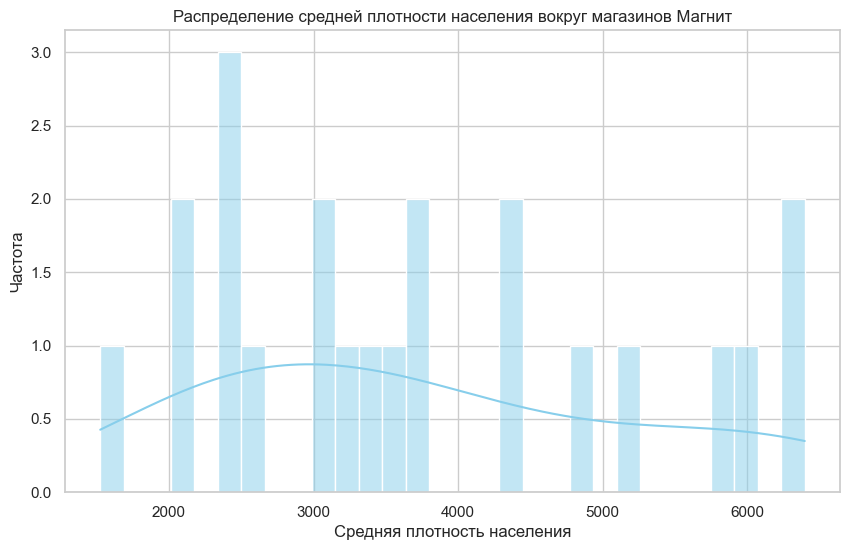

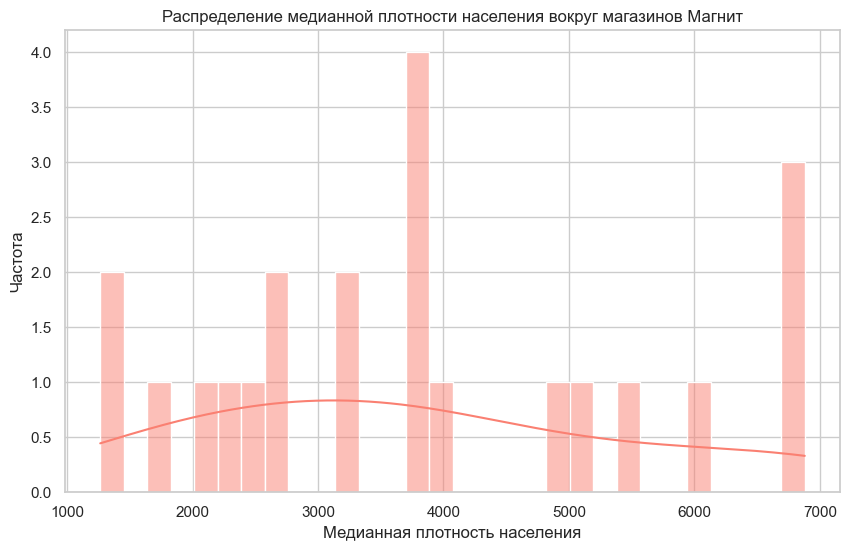

In [99]:
plt.figure(figsize=(10,6))
sns.histplot(magnit_gdf['Population_Mean'], bins=30, kde=True, color='skyblue')
plt.title('Распределение средней плотности населения вокруг магазинов Магнит')
plt.xlabel('Средняя плотность населения')
plt.ylabel('Частота')
plt.show()

plt.figure(figsize=(10,6))
sns.histplot(magnit_gdf['Population_Median'], bins=30, kde=True, color='salmon')
plt.title('Распределение медианной плотности населения вокруг магазинов Магнит')
plt.xlabel('Медианная плотность населения')
plt.ylabel('Частота')
plt.show()


Плотность населения - важный фактор при выборе магазина, поэтому магазины стоят в районах от 2 тысяч человек на гексагон в 400 м

In [100]:
print("Пропущенные значения в Population_Mean:", magnit_gdf['Population_Mean'].isnull().sum())
print("Пропущенные значения в Population_Median:", magnit_gdf['Population_Median'].isnull().sum())


Пропущенные значения в Population_Mean: 0
Пропущенные значения в Population_Median: 0


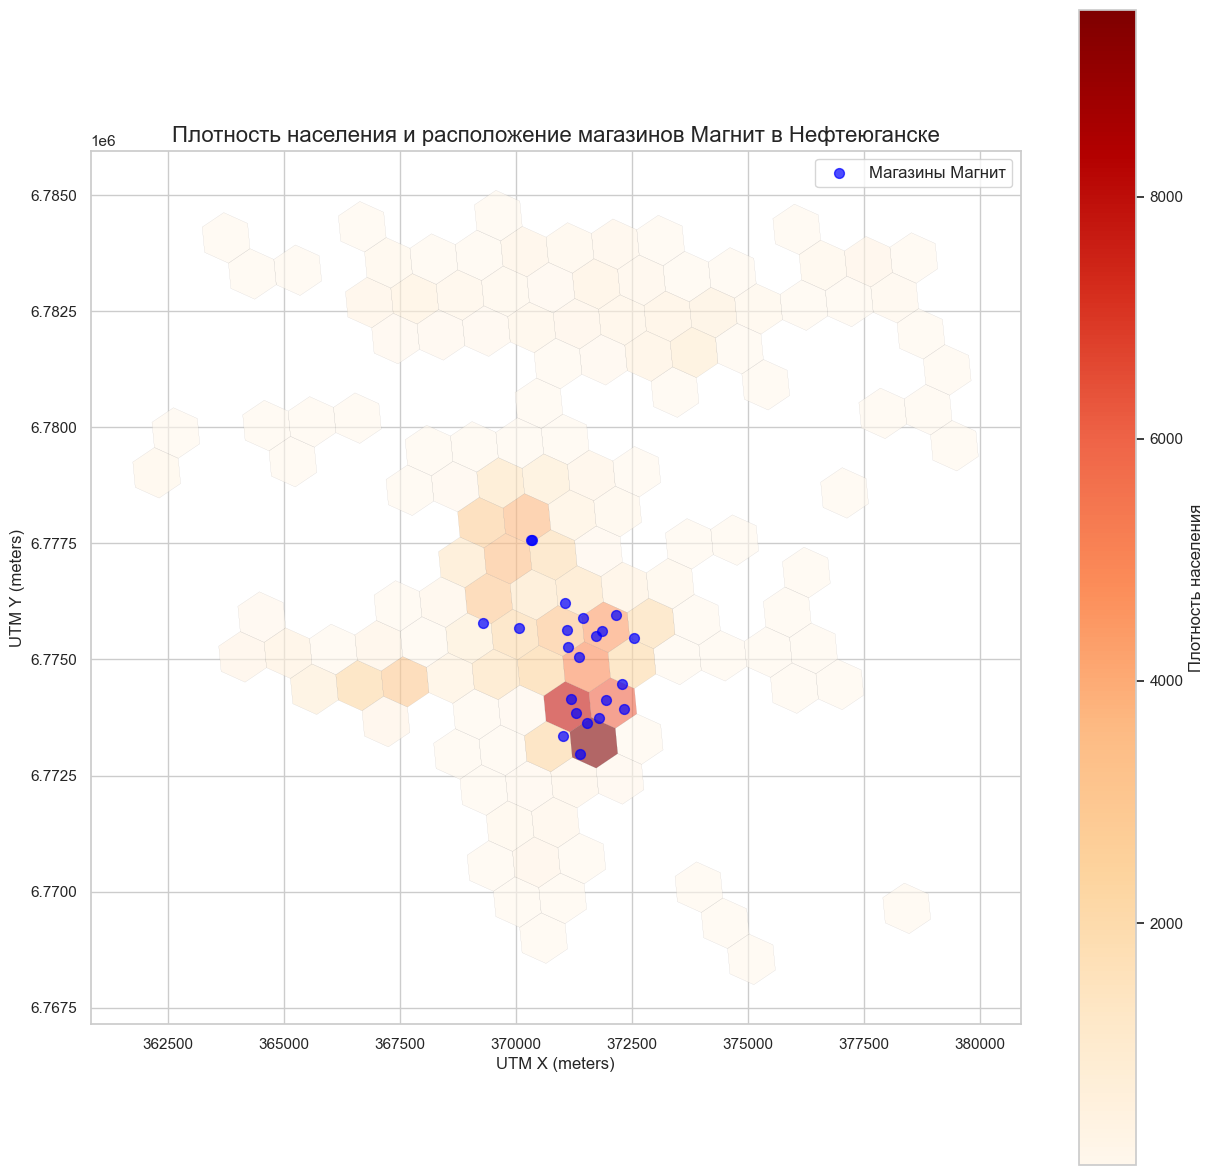

In [101]:
plt.figure(figsize=(15, 15))

pop_plot = pop_gdf.plot(
    column='population',           # столбец для цветовой шкалы
    cmap='OrRd',                   # цветовая карта
    linewidth=0.1,                 # толщина границ полигонов
    edgecolor='gray',              # цвет границ полигонов
    alpha=0.6,                     # прозрачность полигонов
    legend=True,                   # отображение легенды
    legend_kwds={
        'label': "Плотность населения",
        'orientation': "vertical"
    },
    ax=plt.gca()                   # использование текущей оси
)

magnit_gdf.plot(
    ax=plt.gca(),
    marker='o',                    # маркер точки
    color='blue',                  # цвет маркера
    markersize=50,                 # размер маркера
    label='Магазины Магнит',       # метка для легенды
    alpha=0.7                      # прозрачность маркера
)


plt.title('Плотность населения и расположение магазинов Магнит в Нефтеюганске', fontsize=16)
plt.xlabel('UTM X (meters)', fontsize=12)
plt.ylabel('UTM Y (meters)', fontsize=12)


plt.legend(loc='upper right', fontsize=12)


plt.show()


6. Анализ Окружения Магазинов

In [102]:
display(magnit_gdf_utm.head())

,Наименование,Описание,Рубрики,Адрес,Комментарий к адресу,Почтовый индекс,Микрорайон,Район,Город,Округ,...,2GIS URL,Тип,geometry,Residential_Count,Auto_Highway_Length,Pedestrian_Highway_Length,buffer_id,buffer_500m,Population_Mean,Population_Median
0,Магнит,супермаркет,Супермаркеты,"17-й микрорайон, 14",NaN,628306.0,NaN,NaN,Нефтеюганск,Нефтеюганск городской округ,...,https://2gis.com/firm/70000001075570487,branch,POINT (371010.823 6773353.836),91.0,6345.270612,8935.679427,0,"POLYGON ((371510.823 6773353.836, 371508.415 6...",4926.75,5044.5
1,Магнит,супермаркет,Супермаркеты,"13-й микрорайон, 70",1 этаж,628311.0,13-й м-н,NaN,Нефтеюганск,Нефтеюганск городской округ,...,https://2gis.com/firm/70000001007021494,branch,POINT (371790.792 6773747.824),143.0,7054.400499,27492.793464,1,"POLYGON ((372290.792 6773747.824, 372288.385 6...",5839.50,6880.0
2,Магнит,супермаркет,Супермаркеты,"15-й микрорайон, 8",NaN,628306.0,15-й м-н,NaN,Нефтеюганск,Нефтеюганск городской округ,...,https://2gis.com/firm/70000001022179142,branch,POINT (371533.047 6773623.195),165.0,7055.971868,25334.308703,2,"POLYGON ((372033.047 6773623.195, 372030.639 6...",6397.25,6880.0
3,Магнит,супермаркет,Супермаркеты,"микрорайон 16а, 91",1 этаж,628310.0,16а м-н,NaN,Нефтеюганск,Нефтеюганск городской округ,...,https://2gis.com/firm/70000001024729897,branch,POINT (371187.942 6774143.243),94.0,7794.442605,31518.915764,3,"POLYGON ((371687.942 6774143.243, 371685.535 6...",5243.50,5400.5
4,Магнит,супермаркет,Супермаркеты,"17-й микрорайон, 1",NaN,628305.0,NaN,NaN,Нефтеюганск,Нефтеюганск городской округ,...,https://2gis.com/firm/70000001088280797,branch,POINT (371386.199 6772964.667),47.0,7509.442309,11596.069048,4,"POLYGON ((371886.199 6772964.667, 371883.791 6...",3039.25,1263.5


6. Посмотрим корреляцию 

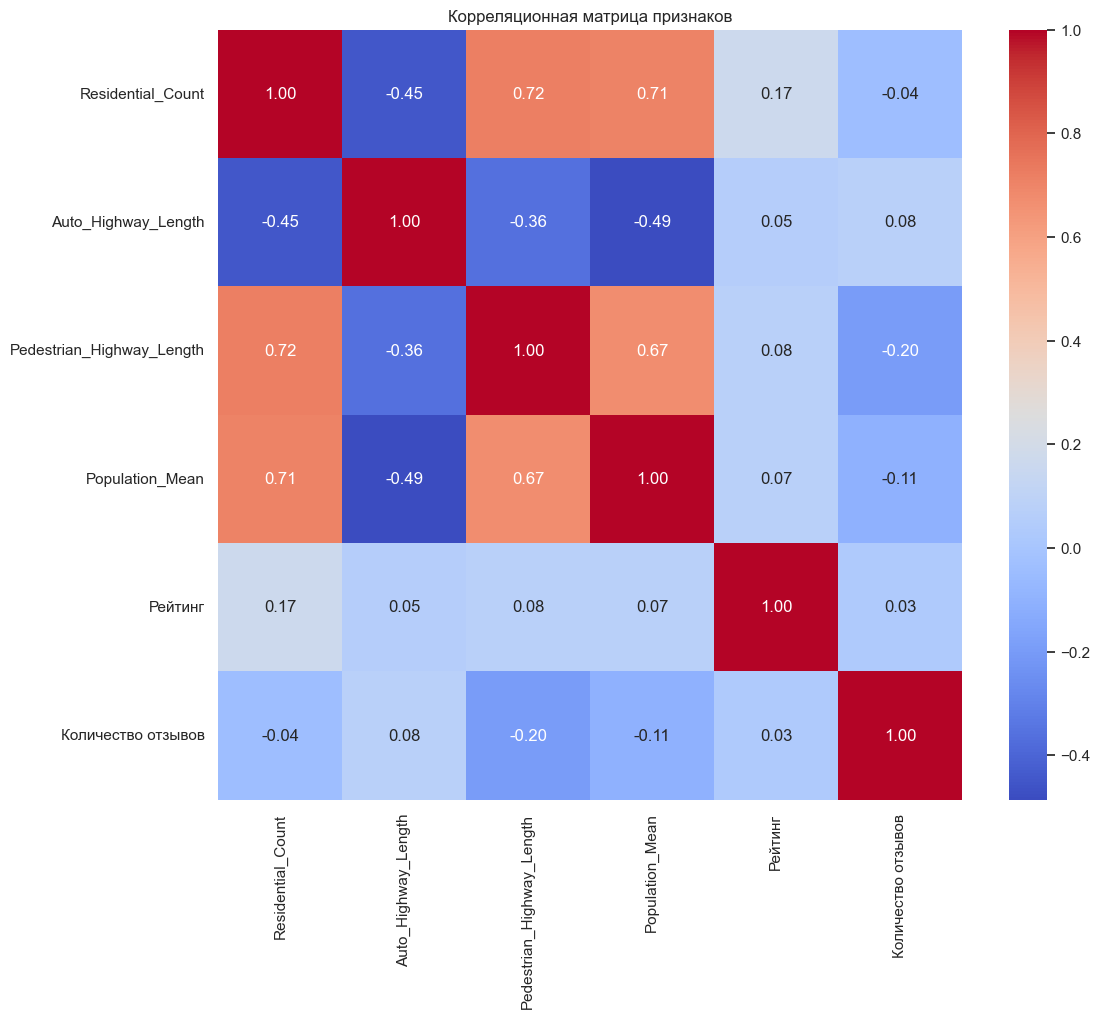

In [103]:
features = ['Residential_Count', 'Auto_Highway_Length', 'Pedestrian_Highway_Length', 'Population_Mean',
             'Рейтинг', 'Количество отзывов']


correlation_matrix = magnit_gdf[features].corr()


plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляционная матрица признаков')
plt.show()


In [104]:
print(correlation_matrix)

                           Residential_Count  Auto_Highway_Length  \
Residential_Count                   1.000000            -0.448774   
Auto_Highway_Length                -0.448774             1.000000   
Pedestrian_Highway_Length           0.716817            -0.361099   
Population_Mean                     0.709085            -0.485867   
Рейтинг                             0.165472             0.054844   
Количество отзывов                 -0.043192             0.076202   

                           Pedestrian_Highway_Length  Population_Mean  \
Residential_Count                           0.716817         0.709085   
Auto_Highway_Length                        -0.361099        -0.485867   
Pedestrian_Highway_Length                   1.000000         0.673633   
Population_Mean                             0.673633         1.000000   
Рейтинг                                     0.076284         0.074338   
Количество отзывов                         -0.197607        -0.107191   

    

Среднеквадратическая ошибка (MSE): 55362313.47377048
Коэффициент детерминации (R^2): 0.16562908483477434


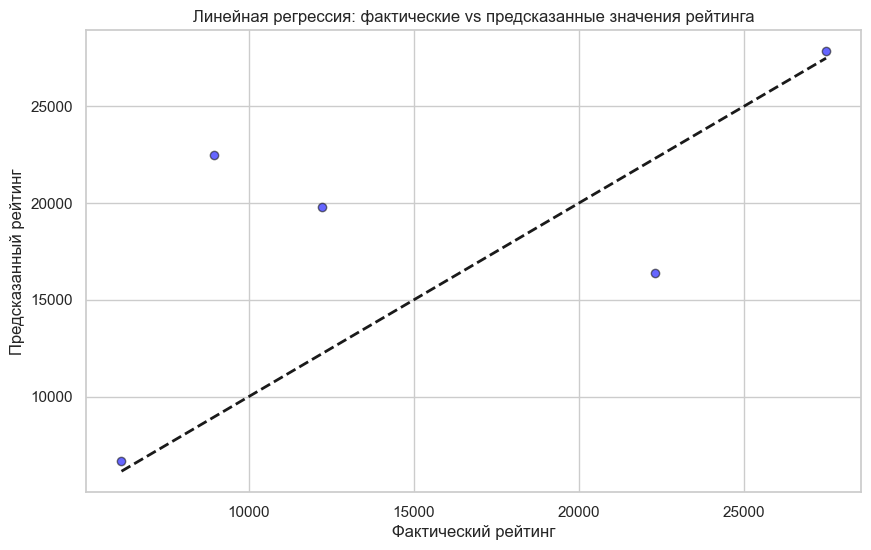

Коэффициенты линейной регрессии:


,Признак,Коэффициент
0,Residential_Count,3919.585725
1,Auto_Highway_Length,-830.291393
2,Количество отзывов,-1375.898126
3,Population_Mean,4116.955833
4,Рейтинг,-44.262404


In [105]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


features = ['Residential_Count', 'Auto_Highway_Length', 'Количество отзывов', 
            'Population_Mean', 'Рейтинг']

# целевая переменная
X = magnit_gdf[features]
y = magnit_gdf['Pedestrian_Highway_Length']

# разделение на тренировочные и тестовые данные
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# масштабирование данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# лбучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# предсказание на тестовых данных
y_pred = model.predict(X_test_scaled)

# лценка качества модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Среднеквадратическая ошибка (MSE): {mse}")
print(f"Коэффициент детерминации (R^2): {r2}")

# визуализация фактических и предсказанных значений
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Фактический рейтинг')
plt.ylabel('Предсказанный рейтинг')
plt.title('Линейная регрессия: фактические vs предсказанные значения рейтинга')
plt.show()

# вывод коэффициентов модели
coefficients = pd.DataFrame({'Признак': features, 'Коэффициент': model.coef_})
print("Коэффициенты линейной регрессии:")
display(coefficients)


Ничего интересного. Поперебирал разные целевые переменные, вспомнил как делается.

Попробуем с другими тегами.

In [106]:
import time
import pandas as pd
import osmnx as ox
import geopandas as gpd
from shapely.geometry import Point


def get_osm_tags_with_retry(lat, lon, radius=500, retries=3, delay=5):
    """
    Получает OSM-теги вокруг заданной точки с повторными попытками в случае ошибок.

    Parameters:
    lat (float): Широта точки.
    lon (float): Долгота точки.
    radius (int): Радиус поиска в метрах.
    retries (int): Количество повторных попыток.
    delay (int): Задержка между попытками в секундах.

    Returns:
    gpd.GeoDataFrame: GeoDataFrame с OSM-тегами.
    """
    for attempt in range(retries):
        try:
            # расширяем список тегов для анализа, включая остановки (highway=bus_stop)
            tags = ox.features_from_point(
                (lat, lon), 
                tags={
                    'building': True,
                    'highway': ['bus_stop', 'motorway', 'trunk', 'primary', 'secondary', 'tertiary', 'unclassified', 'residential', 'footway', 'pedestrian', 'path'],  
                    'construction': True,  # строительные площадки
                    'amenity': ['school', 'hospital', 'restaurant', 'cafe', 'bank'],  # учреждения
                    'shop': True,  
                    'parking': True 
                }, 
                dist=radius
            )
            return tags
        except Exception as e:
            print(f"Попытка {attempt+1}/{retries} не удалась для ({lat}, {lon}): {e}")
            time.sleep(delay)
    print(f"Не удалось получить OSM данные для ({lat}, {lon}) после {retries} попыток.")
    return gpd.GeoDataFrame()

def process_osm_tags(tags, utm_crs):
    """
    Обрабатывает OSM-теги и подсчитывает количество жилых зданий, дорог, остановок и других объектов.

    Parameters:
    tags (gpd.GeoDataFrame): GeoDataFrame с OSM-тегами.
    utm_crs (str): Код проекции UTM.

    Returns:
    tuple: Количество жилых зданий, длина автомобильных дорог, длина пешеходных дорог, количество автобусных остановок, парковок, магазинов и учреждений.
    """
    if tags.empty:
        return 0, 0, 0, 0, 0, 0, 0

    
    residential = tags[tags['building'].isin(['residential', 'apartments', 'house'])]
    residential_count = residential.shape[0]

    
    highways = tags[tags['highway'].notnull()]

    
    highways = highways.to_crs(utm_crs)

    
    auto_highways = highways[highways['highway'].isin(['motorway', 'trunk', 'primary', 'secondary', 'tertiary', 'unclassified', 'residential'])]
    pedestrian_highways = highways[highways['highway'].isin(['footway', 'pedestrian', 'path'])]

   
    auto_length = auto_highways.length.sum()
    pedestrian_length = pedestrian_highways.length.sum()

   
    bus_stops = tags[tags['highway'] == 'bus_stop']
    bus_stop_count = bus_stops.shape[0]


    parking = tags[tags['parking'].notnull()]
    parking_count = parking.shape[0]

 
    shops = tags[tags['shop'].notnull()]
    shop_count = shops.shape[0]

 
    amenities = tags[tags['amenity'].notnull()]
    amenities_count = amenities.shape[0]

    return residential_count, auto_length, pedestrian_length, bus_stop_count, parking_count, shop_count, amenities_count


magnit_gdf_utm[['Residential_Count', 'Auto_Highway_Length', 'Pedestrian_Highway_Length', 'Bus_Stop_Count', 
                'Parking_Count', 'Shop_Count', 'Amenity_Count']] = magnit_gdf.progress_apply(
    lambda row: pd.Series(
        process_osm_tags(get_osm_tags_with_retry(row['Широта'], row['Долгота'], radius=500), utm_crs)
    ),
    axis=1
)


display(magnit_gdf_utm.head())


100%|██████████| 22/22 [00:03<00:00,  6.40it/s]


,Наименование,Описание,Рубрики,Адрес,Комментарий к адресу,Почтовый индекс,Микрорайон,Район,Город,Округ,...,Auto_Highway_Length,Pedestrian_Highway_Length,buffer_id,buffer_500m,Population_Mean,Population_Median,Bus_Stop_Count,Parking_Count,Shop_Count,Amenity_Count
0,Магнит,супермаркет,Супермаркеты,"17-й микрорайон, 14",NaN,628306.0,NaN,NaN,Нефтеюганск,Нефтеюганск городской округ,...,6345.270612,8935.679427,0,"POLYGON ((371510.823 6773353.836, 371508.415 6...",4926.75,5044.5,7.0,15.0,51.0,15.0
1,Магнит,супермаркет,Супермаркеты,"13-й микрорайон, 70",1 этаж,628311.0,13-й м-н,NaN,Нефтеюганск,Нефтеюганск городской округ,...,7054.400499,27492.793464,1,"POLYGON ((372290.792 6773747.824, 372288.385 6...",5839.50,6880.0,15.0,41.0,133.0,57.0
2,Магнит,супермаркет,Супермаркеты,"15-й микрорайон, 8",NaN,628306.0,15-й м-н,NaN,Нефтеюганск,Нефтеюганск городской округ,...,7055.971868,25334.308703,2,"POLYGON ((372033.047 6773623.195, 372030.639 6...",6397.25,6880.0,16.0,42.0,132.0,57.0
3,Магнит,супермаркет,Супермаркеты,"микрорайон 16а, 91",1 этаж,628310.0,16а м-н,NaN,Нефтеюганск,Нефтеюганск городской округ,...,7794.442605,31518.915764,3,"POLYGON ((371687.942 6774143.243, 371685.535 6...",5243.50,5400.5,10.0,28.0,71.0,51.0
4,Магнит,супермаркет,Супермаркеты,"17-й микрорайон, 1",NaN,628305.0,NaN,NaN,Нефтеюганск,Нефтеюганск городской округ,...,7509.442309,11596.069048,4,"POLYGON ((371886.199 6772964.667, 371883.791 6...",3039.25,1263.5,7.0,14.0,44.0,16.0


In [107]:
display(magnit_gdf_utm.head())

,Наименование,Описание,Рубрики,Адрес,Комментарий к адресу,Почтовый индекс,Микрорайон,Район,Город,Округ,...,Auto_Highway_Length,Pedestrian_Highway_Length,buffer_id,buffer_500m,Population_Mean,Population_Median,Bus_Stop_Count,Parking_Count,Shop_Count,Amenity_Count
0,Магнит,супермаркет,Супермаркеты,"17-й микрорайон, 14",NaN,628306.0,NaN,NaN,Нефтеюганск,Нефтеюганск городской округ,...,6345.270612,8935.679427,0,"POLYGON ((371510.823 6773353.836, 371508.415 6...",4926.75,5044.5,7.0,15.0,51.0,15.0
1,Магнит,супермаркет,Супермаркеты,"13-й микрорайон, 70",1 этаж,628311.0,13-й м-н,NaN,Нефтеюганск,Нефтеюганск городской округ,...,7054.400499,27492.793464,1,"POLYGON ((372290.792 6773747.824, 372288.385 6...",5839.50,6880.0,15.0,41.0,133.0,57.0
2,Магнит,супермаркет,Супермаркеты,"15-й микрорайон, 8",NaN,628306.0,15-й м-н,NaN,Нефтеюганск,Нефтеюганск городской округ,...,7055.971868,25334.308703,2,"POLYGON ((372033.047 6773623.195, 372030.639 6...",6397.25,6880.0,16.0,42.0,132.0,57.0
3,Магнит,супермаркет,Супермаркеты,"микрорайон 16а, 91",1 этаж,628310.0,16а м-н,NaN,Нефтеюганск,Нефтеюганск городской округ,...,7794.442605,31518.915764,3,"POLYGON ((371687.942 6774143.243, 371685.535 6...",5243.50,5400.5,10.0,28.0,71.0,51.0
4,Магнит,супермаркет,Супермаркеты,"17-й микрорайон, 1",NaN,628305.0,NaN,NaN,Нефтеюганск,Нефтеюганск городской округ,...,7509.442309,11596.069048,4,"POLYGON ((371886.199 6772964.667, 371883.791 6...",3039.25,1263.5,7.0,14.0,44.0,16.0


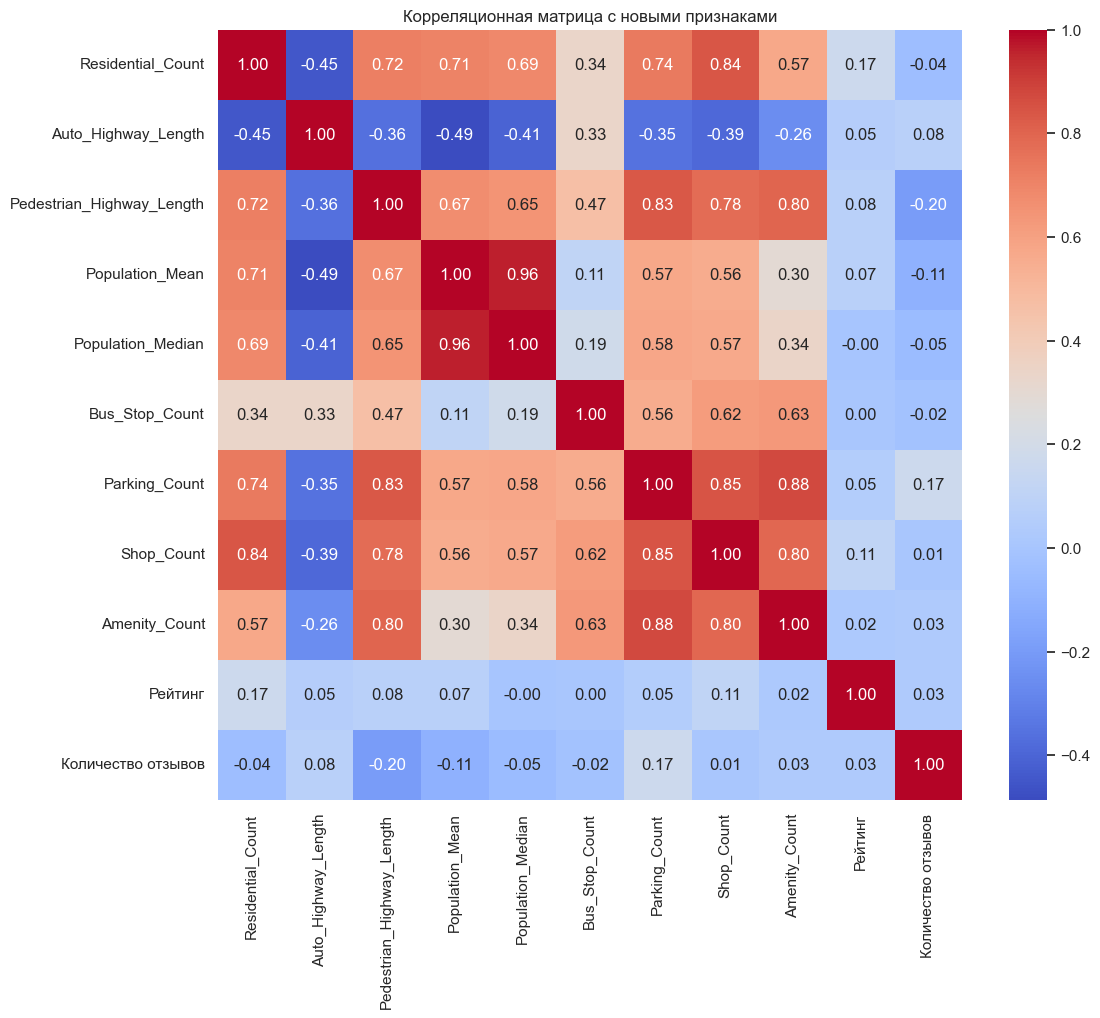

Корреляционная матрица с новыми признаками:
                           Residential_Count  Auto_Highway_Length  \
Residential_Count                   1.000000            -0.448774   
Auto_Highway_Length                -0.448774             1.000000   
Pedestrian_Highway_Length           0.716817            -0.361099   
Population_Mean                     0.709085            -0.485867   
Population_Median                   0.690846            -0.405649   
Bus_Stop_Count                      0.338262             0.333105   
Parking_Count                       0.735606            -0.354122   
Shop_Count                          0.839784            -0.391566   
Amenity_Count                       0.570963            -0.256778   
Рейтинг                             0.165472             0.054844   
Количество отзывов                 -0.043192             0.076202   

                           Pedestrian_Highway_Length  Population_Mean  \
Residential_Count                           0.716817  

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt


features = ['Residential_Count', 'Auto_Highway_Length', 'Pedestrian_Highway_Length',
            'Population_Mean', 'Population_Median',
            'Bus_Stop_Count', 'Parking_Count', 'Shop_Count', 'Amenity_Count',
            'Рейтинг', 'Количество отзывов']


correlation_matrix = magnit_gdf_utm[features].corr()

plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляционная матрица с новыми признаками')
plt.show()


print("Корреляционная матрица с новыми признаками:")
print(correlation_matrix)


Вычисление расстояния до ближайшего конкурента (Пятерочка) и до ближайшей новостройки

In [109]:
from shapely.ops import nearest_points

def calculate_nearest_distance(point, competitors_gdf):
    """
    Вычисляет расстояние от точки до ближайшего конкурента.
    
    Parameters:
    point (shapely.geometry.Point): Координаты магазина.
    competitors_gdf (GeoDataFrame): GeoDataFrame с конкурентами.
    
    Returns:
    float: Расстояние до ближайшего конкурента.
    """

    nearest_geom = competitors_gdf.geometry.unary_union
    nearest_point = nearest_points(point, nearest_geom)[1]
    
    return point.distance(nearest_point)


magnit_gdf_utm['Distance_To_Competitor'] = magnit_gdf_utm.geometry.apply(
    lambda point: calculate_nearest_distance(point, pyaterochka_gdf.to_crs(utm_crs))
)


print("Магазины Магнит с расстоянием до ближайшего конкурента:")
display(magnit_gdf_utm[['Наименование', 'Distance_To_Competitor']].head())


Магазины Магнит с расстоянием до ближайшего конкурента:


,Наименование,Distance_To_Competitor
0,Магнит,376.836489
1,Магнит,420.140694
2,Магнит,508.592591
3,Магнит,578.202628
4,Магнит,199.122378


In [110]:
def calculate_nearest_building_distance(point, buildings_gdf):
    """
    Вычисляет расстояние от точки до ближайшей новостройки.
    
    Parameters:
    point (shapely.geometry.Point): Координаты магазина.
    buildings_gdf (GeoDataFrame): GeoDataFrame с новостройками.
    
    Returns:
    float: Расстояние до ближайшей новостройки.
    """
    nearest_geom = buildings_gdf.geometry.unary_union
    nearest_point = nearest_points(point, nearest_geom)[1]
    
    return point.distance(nearest_point)


magnit_gdf_utm['Distance_To_New_Building'] = magnit_gdf_utm.geometry.apply(
    lambda point: calculate_nearest_building_distance(point, novostroyka_gdf.to_crs(utm_crs))
)


print("Магазины Магнит с расстоянием до ближайшей новостройки:")
display(magnit_gdf_utm[['Наименование', 'Distance_To_New_Building']].head())


Магазины Магнит с расстоянием до ближайшей новостройки:


,Наименование,Distance_To_New_Building
0,Магнит,77.912863
1,Магнит,472.068090
2,Магнит,524.219724
3,Магнит,351.466237
4,Магнит,597.911562


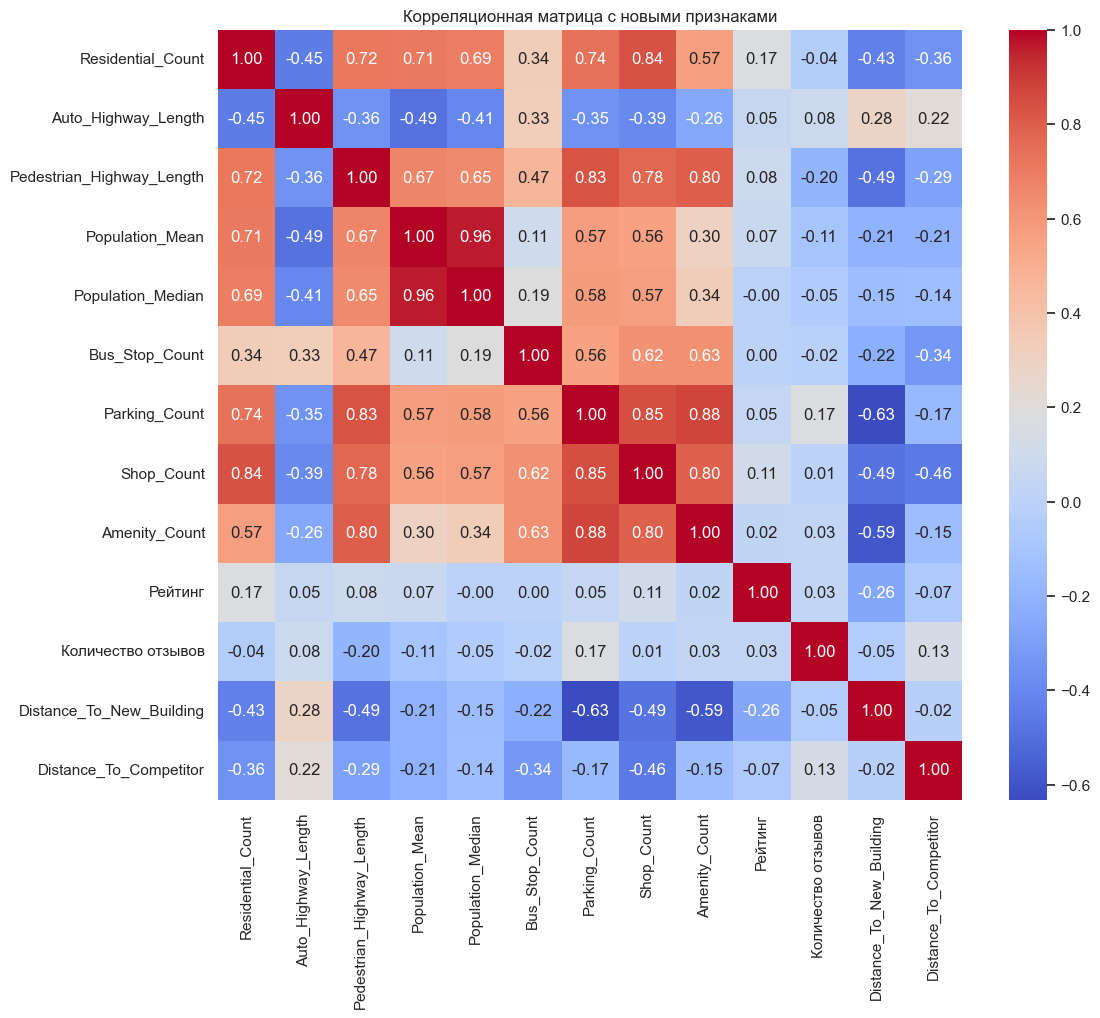

Корреляционная матрица с новыми признаками:
                           Residential_Count  Auto_Highway_Length  \
Residential_Count                   1.000000            -0.448774   
Auto_Highway_Length                -0.448774             1.000000   
Pedestrian_Highway_Length           0.716817            -0.361099   
Population_Mean                     0.709085            -0.485867   
Population_Median                   0.690846            -0.405649   
Bus_Stop_Count                      0.338262             0.333105   
Parking_Count                       0.735606            -0.354122   
Shop_Count                          0.839784            -0.391566   
Amenity_Count                       0.570963            -0.256778   
Рейтинг                             0.165472             0.054844   
Количество отзывов                 -0.043192             0.076202   
Distance_To_New_Building           -0.432932             0.282448   
Distance_To_Competitor             -0.363024             0.

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt


features = ['Residential_Count', 'Auto_Highway_Length', 'Pedestrian_Highway_Length',
            'Population_Mean', 'Population_Median',
            'Bus_Stop_Count', 'Parking_Count', 'Shop_Count', 'Amenity_Count',
            'Рейтинг', 'Количество отзывов', 'Distance_To_New_Building', 'Distance_To_Competitor' ]


correlation_matrix = magnit_gdf_utm[features].corr()

plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляционная матрица с новыми признаками')
plt.show()

print("Корреляционная матрица с новыми признаками:")
print(correlation_matrix)


Промежуточные результаты:
1. Residential_Count и расстояние до конкурента:
Отрицательная корреляция (-0.36). Это указывает на то, что магазины, находящиеся ближе к конкурентам, расположены в более населённых районах.

2. Auto_Highway_Length и расстояние до конкурента:
Положительная корреляция (0.22). Магазины, находящиеся дальше от конкурентов, чаще располагаются в районах с более развитой автомобильной инфраструктурой.

3. Pedestrian_Highway_Length и расстояние до новостройки:
Отрицательная корреляция (-0.49). Магазины, расположенные ближе к новостройкам, имеют менее развитую пешеходную инфраструктуру.

4. Population_Mean и расстояние до конкурентов:
Отрицательная корреляция (-0.21). Магазины, находящиеся ближе к конкурентам, расположены в районах с большей плотностью населения.

5. Population_Median и расстояние до новостройки:
Отрицательная корреляция (-0.15). Магазины, расположенные ближе к новостройкам, находятся в районах с меньшей плотностью населения.

6. Bus_Stop_Count и расстояние до конкурента:
Отрицательная корреляция (-0.34). Магазины, находящиеся ближе к конкурентам, находятся в районах с лучшей транспортной доступностью (автобусные остановки).

7. Parking_Count и расстояние до новостройки:
Отрицательная корреляция (-0.63). В районах с большим количеством парковочных мест новостройки находятся дальше, что может свидетельствовать о меньшей плотности застройки.

8. Shop_Count и расстояние до конкурента:
Отрицательная корреляция (-0.46). Магазины, находящиеся ближе к конкурентам, также расположены в районах с большим количеством других магазинов.

9. Amenity_Count и расстояние до новостройки:
Отрицательная корреляция (-0.59). В районах с большим количеством учреждений (школы, больницы, кафе) новостройки находятся дальше.

10. Рейтинг и расстояние до новостройки:
Отрицательная корреляция (-0.26). Магазины, находящиеся ближе к новостройкам, имеют немного ниже рейтинг.

11. Количество отзывов и расстояние до конкурентов:
Положительная корреляция (0.13). Магазины, находящиеся дальше от конкурентов, имеют больше отзывов, что может свидетельствовать о том, что магазины с большей популярностью расположены на расстоянии от конкурентов.

12. Distance_To_Competitor и Distance_To_New_Building:
Незначительная отрицательная корреляция (-0.02). Это говорит о том, что расстояние до ближайшей новостройки и до конкурента слабо коррелируют между собой.



Самые интересные наблюдения:

Отрицательная корреляция между расстоянием до новостроек и количеством парковочных мест (-0.63):
Это одно из самых сильных отношений в матрице. Оно показывает, что в районах с большим количеством парковок новостройки находятся дальше. Это может свидетельствовать о том, что новостройки появляются в менее застроенных районах, где меньше плотности застройки и инфраструктуры.

Отрицательная корреляция между количеством магазинов и расстоянием до конкурентов (-0.46):
Магазины, находящиеся ближе к конкурентам, расположены в торговых районах с большим количеством других магазинов. Это указывает на плотную конкуренцию в таких районах.

Отрицательная корреляция между количеством учреждений (Amenity_Count) и расстоянием до новостроек (-0.59):
Чем ближе магазин к новостройке, тем меньше вокруг учреждений, что может свидетельствовать о недостаточной развитости инфраструктуры в таких районах.

Положительная корреляция между количеством отзывов и расстоянием до конкурентов (0.13):
Магазины, находящиеся дальше от конкурентов, имеют больше отзывов. Это может говорить о том, что магазины, находящиеся в районах с меньшей конкуренцией, получают больше внимания клиентов.

Отрицательная корреляция между количеством автобусных остановок и расстоянием до конкурентов (-0.34):
В районах с развитой транспортной инфраструктурой (большим количеством автобусных остановок) магазины Магнит находятся ближе к конкурентам. Это говорит о важности транспортной доступности для конкуренции между магазинами.

7. ML (sklearn + XGBoost).
Так как входные данные скудные, попробуем добавить столбец прибыльности магазина. Представим, что если рейтинг выше 4х, то магазин профитный.

In [112]:
magnit_gdf_utm['Is_Profitable'] = (magnit_gdf_utm['Рейтинг'] > 4.0).astype(int)


Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       1.00      0.33      0.50         3

    accuracy                           0.60         5
   macro avg       0.75      0.67      0.58         5
weighted avg       0.80      0.60      0.57         5



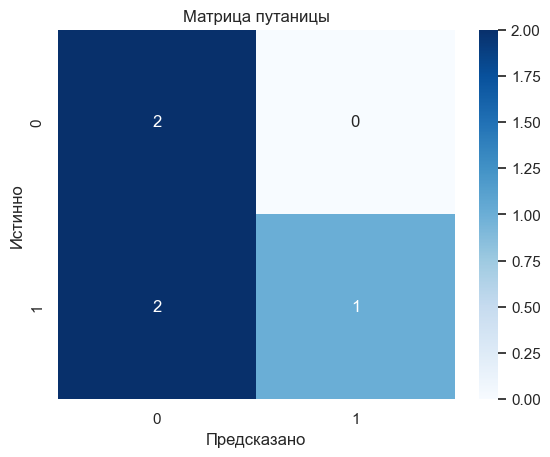

In [113]:
features = ['Residential_Count', 'Auto_Highway_Length', 'Pedestrian_Highway_Length',
            'Population_Mean', 'Population_Median', 'Bus_Stop_Count', 'Parking_Count', 
            'Shop_Count', 'Amenity_Count', 'Distance_To_Competitor', 'Distance_To_New_Building']


X = magnit_gdf_utm[features]
y = magnit_gdf_utm['Is_Profitable']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = xgb.XGBClassifier(
    objective='binary:logistic', 
    n_estimators=100, 
    learning_rate=0.1, 
    max_depth=5, 
    random_state=42
)

model.fit(X_train_scaled, y_train)


y_pred = model.predict(X_test_scaled)


print("Classification Report:")
print(classification_report(y_test, y_pred))

# матрица путаницы
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Предсказано')
plt.ylabel('Истинно')
plt.title('Матрица путаницы')
plt.show()


Precision (Точность):

Для класса 0 (неприбыльные магазины): 0.50, что означает, что половина предсказанных как неприбыльные магазины действительно не прибыльны.
Для класса 1 (прибыльные магазины): 1.00, что значит, что все предсказанные прибыльные магазины действительно прибыльны.

Recall (Полнота):
Для класса 0: 1.00, что значит, что все неприбыльные магазины были предсказаны верно.
Для класса 1: 0.33, что означает, что модель нашла только треть прибыльных магазинов. Это свидетельствует о том, что модель имеет проблемы с обнаружением прибыльных магазинов.

F1-score:
Для класса 0: 0.67, это гармоническое среднее между точностью и полнотой.

Для класса 1: 0.50, что указывает на низкую эффективность в предсказании прибыльных магазинов.
Accuracy (Точность):
Общая точность модели составляет 0.60, что означает, что модель правильно классифицировала 60% данных.

Попробуем кросс-валидацию, тк у нас всего 22 объекта.

In [114]:
from sklearn.model_selection import cross_val_score

# Кросс-валидация с 5 фолдами
scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')

# Средняя точность и разброс
print(f"Средняя точность: {scores.mean():.4f}")
print(f"Разброс точности: {scores.std():.4f}")


Средняя точность: 0.5500
Разброс точности: 0.1633


Средняя точность 0.55 и разброс 0.1633 означают, что модель предсказывает правильно в 55% случаев, но результаты нестабильны, с колебаниями от фолда к фолду. Разброс в 16.33% указывает на значительную вариативность в результатах.

Попробуем SelectKbest, хоть данные и так маленькие

In [115]:
from sklearn.feature_selection import SelectKBest, f_classif

# отбор 5 лучших признаков
selector = SelectKBest(score_func=f_classif, k=5)
X_selected = selector.fit_transform(X_train_scaled, y_train)

# использование отобранных признаков для кросс-валидации
scores = cross_val_score(model, X_selected, y_train, cv=5, scoring='accuracy')

print(f"Средняя точность после отбора признаков: {scores.mean():.4f}")
print(f"Разброс точности: {scores.std():.4f}")


Средняя точность после отбора признаков: 0.7000
Разброс точности: 0.0408


Средняя точность 0.70 и низкий разброс 0.0408 указывают на то, что модель после отбора признаков стала лучше и стабильнее. Это позитивный знак, так как модель теперь может более эффективно предсказывать прибыльные и неприбыльные магазины с большей консистентностью.

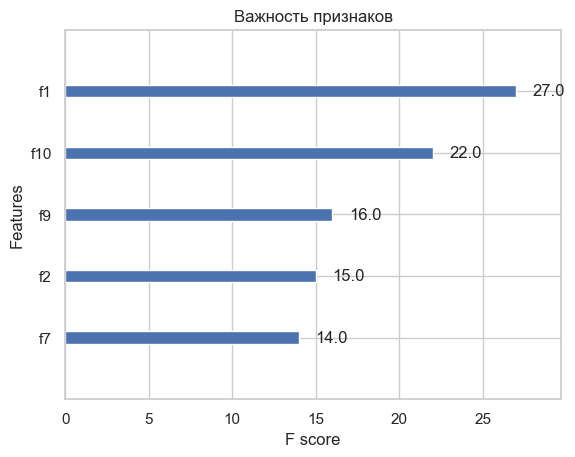

In [116]:
xgb.plot_importance(model, max_num_features=5)
plt.title('Важность признаков')
plt.show()


In [117]:
# важность признаков из модели XGBoost
importances = model.feature_importances_

# названия признаков
feature_names = X.columns

# соединение значений важности и названий признаков
importance_with_names = sorted(zip(importances, feature_names), reverse=True)


for importance, name in importance_with_names:
    print(f"{name}: {importance:.2f}")


Pedestrian_Highway_Length: 0.45
Auto_Highway_Length: 0.23
Residential_Count: 0.09
Distance_To_New_Building: 0.09
Distance_To_Competitor: 0.06
Shop_Count: 0.05
Bus_Stop_Count: 0.03
Amenity_Count: 0.01
Population_Median: 0.00
Population_Mean: 0.00
Parking_Count: 0.00


Pedestrian_Highway_Length (0.45):
Длина пешеходных путей оказалась самым значимым фактором. Это может указывать на то, что наличие пешеходной инфраструктуры играет важную роль в прибыльности магазинов. Чем лучше доступ к магазину для пешеходов, тем выше вероятность его успеха.

Auto_Highway_Length (0.23):
Длина автомобильных дорог тоже важна, но чуть менее значима, чем пешеходные пути. Хорошая транспортная доступность для автомобилей способствует большему числу покупателей.

Residential_Count (0.09):
Количество жилых домов поблизости также влияет на прибыльность, но этот фактор менее значим по сравнению с инфраструктурой для пешеходов и автомобилей.

Distance_To_New_Building (0.09):
Расстояние до новостроек оказалось значимым. Это может свидетельствовать о том, что магазины, расположенные ближе к новым жилым комплексам, имеют более высокие шансы на успех.

Distance_To_Competitor (0.06):
Расстояние до ближайшего конкурента также важно, но меньше, чем факторы инфраструктуры.

Shop_Count (0.05):
Количество магазинов поблизости оказывает влияние на прибыльность, но не так сильно, как инфраструктура и расстояние до новостроек.

Bus_Stop_Count (0.03):
Наличие автобусных остановок поблизости играет меньшую роль, но всё же влияет на доступность магазинов для покупателей.

Amenity_Count (0.01):
Количество удобств (кафе, рестораны, и т.д.) также имеет минимальное влияние.

Population_Median и Population_Mean (0.00):
Эти признаки оказались наименее значимыми в этой модели, что может говорить о том, что плотность населения в районе не сильно влияет на прибыльность магазина, по крайней мере, в текущих данных.

Parking_Count (0.00):
Количество парковочных мест также оказалось незначимым, что может свидетельствовать о том, что покупатели меньше зависят от наличия парковок в данной выборке данных.

Как видим, прибыльность мы брали из рейтинга и возможно из-за магазинов с меньшим рейтингом у нас отпала важность густонаселенности района. Но пешеходные пути как косвенный признак говорят о том что доступность - важный фактор. Попробуем запредиктить места, в которых можно было бы поставить новый магазин исходя из плотности пешеходных путей и автодорог.
Создадим сеть потенциальных точек и используем модель предсказаний для них.

In [118]:
import osmnx as ox
import geopandas as gpd
import numpy as np
from shapely.geometry import Point
from shapely.geometry import Polygon
import random

# Получим границы Нефтеюганска из OSM
nefteyugansk_gdf = ox.geocode_to_gdf("Нефтеюганск, Россия")

# Отобразим границы города
display(nefteyugansk_gdf)

# Преобразуем границы в WGS84 для удобства дальнейшей работы с OSM и преобразований
nefteyugansk_gdf_wgs = nefteyugansk_gdf.to_crs(epsg=4326)
display(nefteyugansk_gdf_wgs)

# Преобразуем в UTM для дальнейших расчетов длины дорог
utm_crs = 'EPSG:32643'  # UTM zone 43N для Нефтеюганска
nefteyugansk_gdf_utm = nefteyugansk_gdf.to_crs(utm_crs)

# Получим границы Нефтеюганска в виде полигона
city_boundary = nefteyugansk_gdf_utm.unary_union

# Генерация случайных точек внутри границ города
def generate_random_points_within_polygon(polygon, num_points):
    points = []
    min_x, min_y, max_x, max_y = polygon.bounds
    while len(points) < num_points:
        random_point = Point([random.uniform(min_x, max_x), random.uniform(min_y, max_y)])
        if polygon.contains(random_point):
            points.append(random_point)
    return points

# Генерируем 100 случайных точек
random_points = generate_random_points_within_polygon(city_boundary, 100)

# Создаем GeoDataFrame для этих точек в UTM CRS
random_points_gdf = gpd.GeoDataFrame(geometry=random_points, crs=utm_crs)

# Выведем первые несколько случайных точек
display(random_points_gdf.head())

# Преобразуем точки обратно в WGS84 для работы с OSM
random_points_gdf_wgs = random_points_gdf.to_crs(epsg=4326)

# Просмотр первых точек в WGS
display(random_points_gdf_wgs.head())


,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,class,type,place_rank,importance,addresstype,name,display_name
0,"POLYGON ((72.48310 61.09129, 72.48661 61.08735...",61.130213,61.062281,72.679537,72.4831,190600432,way,42969693,61.096204,72.611191,place,city,16,0.509827,city,Nefteyugansk,"Nefteyugansk, Khanty-Mansiysk Autonomous Okrug..."


,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,class,type,place_rank,importance,addresstype,name,display_name
0,"POLYGON ((72.48310 61.09129, 72.48661 61.08735...",61.130213,61.062281,72.679537,72.4831,190600432,way,42969693,61.096204,72.611191,place,city,16,0.509827,city,Nefteyugansk,"Nefteyugansk, Khanty-Mansiysk Autonomous Okrug..."


,geometry
0,POINT (372895.356 6778737.387)
1,POINT (370928.062 6776811.852)
2,POINT (370197.953 6778956.278)
3,POINT (371998.745 6776456.006)
4,POINT (365295.819 6774563.205)


,geometry
0,POINT (72.64049 61.12262)
1,POINT (72.60532 61.10470)
2,POINT (72.59032 61.12370)
3,POINT (72.62540 61.10186)
4,POINT (72.50253 61.08265)


In [119]:
import time
import osmnx as ox
import pandas as pd


def process_osm_for_potential_points(lat, lon, radius=500, retries=3, delay=5, utm_crs="EPSG:32643"):
    """
    Получает OSM-теги вокруг заданной точки и подсчитывает длины дорог, а также количество остановок, парковок, магазинов и других объектов.
    
    Parameters:
    lat (float): Широта точки.
    lon (float): Долгота точки.
    radius (int): Радиус поиска в метрах.
    retries (int): Количество повторных попыток.
    delay (int): Задержка между попытками в секундах.
    utm_crs (str): Код проекции UTM.
    
    Returns:
    tuple: (длина автомобильных дорог в метрах, длина пешеходных дорог в метрах, количество автобусных остановок, парковок, магазинов, жилых зданий и учреждений).
    """
    for attempt in range(retries):
        try:
            tags = ox.features_from_point(
                (lat, lon), 
                tags={
                    'building': True,
                    'highway': ['bus_stop', 'motorway', 'trunk', 'primary', 'secondary', 'tertiary', 'unclassified', 'residential', 'footway', 'pedestrian', 'path'],
                    'amenity': ['school', 'hospital', 'restaurant', 'cafe', 'bank'],
                    'shop': True,
                    'parking': True
                }, 
                dist=radius
            )
            
            if tags.empty:
                return 0, 0, 0, 0, 0, 0, 0

            tags = tags.to_crs(utm_crs)

            auto_highways = tags[tags['highway'].isin(['motorway', 'trunk', 'primary', 'secondary', 'tertiary', 'residential'])]
            pedestrian_highways = tags[tags['highway'].isin(['footway', 'pedestrian', 'path'])]

            auto_length = auto_highways.length.sum()
            pedestrian_length = pedestrian_highways.length.sum()

            bus_stops = tags[tags['highway'] == 'bus_stop']
            bus_stop_count = bus_stops.shape[0]

            parking = tags[tags['parking'].notnull()]
            parking_count = parking.shape[0]

            shops = tags[tags['shop'].notnull()]
            shop_count = shops.shape[0]

            residential_buildings = tags[tags['building'].isin(['residential', 'apartments', 'house'])]
            residential_count = residential_buildings.shape[0]

            amenities = tags[tags['amenity'].notnull()]
            amenities_count = amenities.shape[0]

            return auto_length, pedestrian_length, bus_stop_count, parking_count, shop_count, residential_count, amenities_count
        except Exception as e:
            print(f"Попытка {attempt + 1}/{retries} не удалась для ({lat}, {lon}): {e}")
            time.sleep(delay)
    return 0, 0, 0, 0, 0, 0, 0

random_points_gdf_wgs[['Auto_Highway_Length', 'Pedestrian_Highway_Length', 'Bus_Stop_Count', 
                       'Parking_Count', 'Shop_Count', 'Residential_Count', 'Amenity_Count']] = random_points_gdf_wgs.progress_apply(
    lambda row: pd.Series(process_osm_for_potential_points(row.geometry.y, row.geometry.x, radius=500, utm_crs=utm_crs)),
    axis=1
)

random_points_gdf_utm = random_points_gdf_wgs.to_crs(utm_crs)

display(random_points_gdf_utm[['Auto_Highway_Length', 'Pedestrian_Highway_Length', 'Bus_Stop_Count', 
                               'Parking_Count', 'Shop_Count', 'Residential_Count', 'Amenity_Count']].head())


  0%|          | 0/100 [00:00<?, ?it/s]

Попытка 1/3 не удалась для (61.12261760402794, 72.6404907890615): 'parking'
Попытка 2/3 не удалась для (61.12261760402794, 72.6404907890615): 'parking'
Попытка 3/3 не удалась для (61.12261760402794, 72.6404907890615): 'parking'


  3%|▎         | 3/100 [00:19<09:34,  5.92s/it]

Попытка 1/3 не удалась для (61.12369875305957, 72.59031953482008): 'parking'
Попытка 2/3 не удалась для (61.12369875305957, 72.59031953482008): 'parking'
Попытка 3/3 не удалась для (61.12369875305957, 72.59031953482008): 'parking'


  6%|▌         | 6/100 [00:40<08:44,  5.58s/it]

Попытка 1/3 не удалась для (61.08907586681906, 72.51277582205373): 'highway'
Попытка 2/3 не удалась для (61.08907586681906, 72.51277582205373): 'highway'
Попытка 3/3 не удалась для (61.08907586681906, 72.51277582205373): 'highway'


  7%|▋         | 7/100 [00:57<14:19,  9.24s/it]

Попытка 1/3 не удалась для (61.128002054491404, 72.60591560458006): 'parking'
Попытка 2/3 не удалась для (61.128002054491404, 72.60591560458006): 'parking'
Попытка 3/3 не удалась для (61.128002054491404, 72.60591560458006): 'parking'


 11%|█         | 11/100 [01:24<08:44,  5.89s/it]

Попытка 1/3 не удалась для (61.111852346572995, 72.6522731520092): 'parking'
Попытка 2/3 не удалась для (61.111852346572995, 72.6522731520092): 'parking'
Попытка 3/3 не удалась для (61.111852346572995, 72.6522731520092): 'parking'


 13%|█▎        | 13/100 [01:44<10:38,  7.34s/it]

Попытка 1/3 не удалась для (61.09240253250269, 72.49998888319381): 'parking'
Попытка 2/3 не удалась для (61.09240253250269, 72.49998888319381): 'parking'
Попытка 3/3 не удалась для (61.09240253250269, 72.49998888319381): 'parking'


 17%|█▋        | 17/100 [02:08<06:53,  4.99s/it]

Попытка 1/3 не удалась для (61.12424390867793, 72.55931570342912): 'parking'
Попытка 2/3 не удалась для (61.12424390867793, 72.55931570342912): 'parking'
Попытка 3/3 не удалась для (61.12424390867793, 72.55931570342912): 'parking'


 18%|█▊        | 18/100 [02:25<11:53,  8.70s/it]

Попытка 1/3 не удалась для (61.06452279761186, 72.62463946781759): 'parking'
Попытка 2/3 не удалась для (61.06452279761186, 72.62463946781759): 'parking'
Попытка 3/3 не удалась для (61.06452279761186, 72.62463946781759): 'parking'


 20%|██        | 20/100 [02:45<11:23,  8.54s/it]

Попытка 1/3 не удалась для (61.11888939111107, 72.59631719306215): 'parking'
Попытка 2/3 не удалась для (61.11888939111107, 72.59631719306215): 'parking'
Попытка 3/3 не удалась для (61.11888939111107, 72.59631719306215): 'parking'


 21%|██        | 21/100 [03:02<14:51, 11.29s/it]

Попытка 1/3 не удалась для (61.09102030384594, 72.48593417017446): 'parking'
Попытка 2/3 не удалась для (61.09102030384594, 72.48593417017446): 'parking'
Попытка 3/3 не удалась для (61.09102030384594, 72.48593417017446): 'parking'


 25%|██▌       | 25/100 [03:27<07:28,  5.98s/it]

Попытка 1/3 не удалась для (61.08158756912457, 72.51297964172561): 'parking'
Попытка 2/3 не удалась для (61.08158756912457, 72.51297964172561): 'parking'
Попытка 3/3 не удалась для (61.08158756912457, 72.51297964172561): 'parking'


 27%|██▋       | 27/100 [03:46<08:44,  7.18s/it]

Попытка 1/3 не удалась для (61.06376585495735, 72.6178945888343): 'parking'
Попытка 2/3 не удалась для (61.06376585495735, 72.6178945888343): 'parking'
Попытка 3/3 не удалась для (61.06376585495735, 72.6178945888343): 'parking'


 28%|██▊       | 28/100 [04:03<12:19, 10.27s/it]

Попытка 1/3 не удалась для (61.10575642944652, 72.64068874315404): 'shop'
Попытка 2/3 не удалась для (61.10575642944652, 72.64068874315404): 'shop'
Попытка 3/3 не удалась для (61.10575642944652, 72.64068874315404): 'shop'


 30%|███       | 30/100 [04:23<10:59,  9.43s/it]

Попытка 1/3 не удалась для (61.10683706730859, 72.54128280609693): 'parking'
Попытка 2/3 не удалась для (61.10683706730859, 72.54128280609693): 'parking'
Попытка 3/3 не удалась для (61.10683706730859, 72.54128280609693): 'parking'


 31%|███       | 31/100 [04:40<13:25, 11.68s/it]

Попытка 1/3 не удалась для (61.10867530845465, 72.64099080853518): 'shop'
Попытка 2/3 не удалась для (61.10867530845465, 72.64099080853518): 'shop'
Попытка 3/3 не удалась для (61.10867530845465, 72.64099080853518): 'shop'


 33%|███▎      | 33/100 [05:00<11:09, 10.00s/it]

Попытка 1/3 не удалась для (61.08882595528802, 72.55075853679341): 'parking'
Попытка 2/3 не удалась для (61.08882595528802, 72.55075853679341): 'parking'
Попытка 3/3 не удалась для (61.08882595528802, 72.55075853679341): 'parking'


 45%|████▌     | 45/100 [05:40<02:04,  2.27s/it]

Попытка 1/3 не удалась для (61.08895517382975, 72.5676036196161): 'shop'
Попытка 2/3 не удалась для (61.08895517382975, 72.5676036196161): 'shop'
Попытка 3/3 не удалась для (61.08895517382975, 72.5676036196161): 'shop'


 48%|████▊     | 48/100 [06:02<03:55,  4.52s/it]

Попытка 1/3 не удалась для (61.09057247222095, 72.48509390531639): 'parking'
Попытка 2/3 не удалась для (61.09057247222095, 72.48509390531639): 'parking'
Попытка 3/3 не удалась для (61.09057247222095, 72.48509390531639): 'parking'


 50%|█████     | 50/100 [06:22<05:22,  6.44s/it]

Попытка 1/3 не удалась для (61.118448617314414, 72.56786680970846): 'parking'
Попытка 2/3 не удалась для (61.118448617314414, 72.56786680970846): 'parking'
Попытка 3/3 не удалась для (61.118448617314414, 72.56786680970846): 'parking'


 61%|██████    | 61/100 [07:01<01:36,  2.47s/it]

Попытка 1/3 не удалась для (61.09167636366371, 72.49332533654457): 'parking'
Попытка 2/3 не удалась для (61.09167636366371, 72.49332533654457): 'parking'
Попытка 3/3 не удалась для (61.09167636366371, 72.49332533654457): 'parking'


 65%|██████▌   | 65/100 [07:25<02:08,  3.68s/it]

Попытка 1/3 не удалась для (61.08036631787742, 72.54126431179363): 'shop'
Попытка 2/3 не удалась для (61.08036631787742, 72.54126431179363): 'shop'
Попытка 3/3 не удалась для (61.08036631787742, 72.54126431179363): 'shop'


 66%|██████▌   | 66/100 [07:42<04:22,  7.72s/it]

Попытка 1/3 не удалась для (61.09110129760308, 72.55466619711515): 'parking'
Попытка 2/3 не удалась для (61.09110129760308, 72.55466619711515): 'parking'
Попытка 3/3 не удалась для (61.09110129760308, 72.55466619711515): 'parking'


 69%|██████▉   | 69/100 [08:03<03:14,  6.27s/it]

Попытка 1/3 не удалась для (61.12432360800152, 72.56984549033152): 'parking'
Попытка 2/3 не удалась для (61.12432360800152, 72.56984549033152): 'parking'
Попытка 3/3 не удалась для (61.12432360800152, 72.56984549033152): 'parking'


 70%|███████   | 70/100 [08:21<04:47,  9.59s/it]

Попытка 1/3 не удалась для (61.103877587533525, 72.54721796123557): 'parking'
Попытка 2/3 не удалась для (61.103877587533525, 72.54721796123557): 'parking'
Попытка 3/3 не удалась для (61.103877587533525, 72.54721796123557): 'parking'


 71%|███████   | 71/100 [08:38<05:44, 11.86s/it]

Попытка 1/3 не удалась для (61.11903260516812, 72.5800919032774): 'parking'
Попытка 2/3 не удалась для (61.11903260516812, 72.5800919032774): 'parking'
Попытка 3/3 не удалась для (61.11903260516812, 72.5800919032774): 'parking'


 73%|███████▎  | 73/100 [08:57<04:32, 10.09s/it]

Попытка 1/3 не удалась для (61.064096251523566, 72.61401260821484): 'parking'
Попытка 2/3 не удалась для (61.064096251523566, 72.61401260821484): 'parking'
Попытка 3/3 не удалась для (61.064096251523566, 72.61401260821484): 'parking'


 77%|███████▋  | 77/100 [09:21<02:10,  5.65s/it]

Попытка 1/3 не удалась для (61.09817139723559, 72.65523316650952): 'highway'
Попытка 2/3 не удалась для (61.09817139723559, 72.65523316650952): 'highway'
Попытка 3/3 не удалась для (61.09817139723559, 72.65523316650952): 'highway'


 81%|████████  | 81/100 [09:46<01:30,  4.76s/it]

Попытка 1/3 не удалась для (61.08305629091725, 72.5226849905264): 'shop'
Попытка 2/3 не удалась для (61.08305629091725, 72.5226849905264): 'shop'
Попытка 3/3 не удалась для (61.08305629091725, 72.5226849905264): 'shop'


 82%|████████▏ | 82/100 [10:03<02:32,  8.46s/it]

Попытка 1/3 не удалась для (61.10420609534553, 72.63688507851886): 'shop'
Попытка 2/3 не удалась для (61.10420609534553, 72.63688507851886): 'shop'
Попытка 3/3 не удалась для (61.10420609534553, 72.63688507851886): 'shop'


 86%|████████▌ | 86/100 [10:26<01:12,  5.18s/it]

Попытка 1/3 не удалась для (61.09282634708225, 72.53743301276812): 'parking'
Попытка 2/3 не удалась для (61.09282634708225, 72.53743301276812): 'parking'
Попытка 3/3 не удалась для (61.09282634708225, 72.53743301276812): 'parking'


 94%|█████████▍| 94/100 [10:58<00:15,  2.59s/it]

Попытка 1/3 не удалась для (61.123138679738524, 72.57733059998472): 'parking'
Попытка 2/3 не удалась для (61.123138679738524, 72.57733059998472): 'parking'
Попытка 3/3 не удалась для (61.123138679738524, 72.57733059998472): 'parking'


 97%|█████████▋| 97/100 [11:19<00:13,  4.43s/it]

Попытка 1/3 не удалась для (61.081414411828916, 72.5264951430565): 'shop'
Попытка 2/3 не удалась для (61.081414411828916, 72.5264951430565): 'shop'
Попытка 3/3 не удалась для (61.081414411828916, 72.5264951430565): 'shop'


 98%|█████████▊| 98/100 [11:36<00:16,  8.17s/it]

Попытка 1/3 не удалась для (61.110551081011344, 72.67188240723247): 'parking'
Попытка 2/3 не удалась для (61.110551081011344, 72.67188240723247): 'parking'
Попытка 3/3 не удалась для (61.110551081011344, 72.67188240723247): 'parking'


100%|██████████| 100/100 [11:57<00:00,  7.18s/it]


,Auto_Highway_Length,Pedestrian_Highway_Length,Bus_Stop_Count,Parking_Count,Shop_Count,Residential_Count,Amenity_Count
0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,9045.047687,1886.846758,6.0,11.0,15.0,10.0,14.0
2,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
3,7248.505619,7631.398721,9.0,10.0,28.0,23.0,18.0
4,2535.816764,304.759873,4.0,1.0,2.0,19.0,4.0


Применим обученную модель XGBoost для случайных точек, используя длины автодорог и пешеходных путей. Отобразим результаты на карте с цветовой дифференциацией: зелёным - места с хорошим потенциалом, красным - с низким.

In [120]:
from shapely.ops import nearest_points
import geopandas as gpd

def calculate_nearest_distance(point, competitors_gdf):
    """
    Вычисляет расстояние от точки до ближайшего конкурента.
    
    Parameters:
    point (shapely.geometry.Point): Координаты магазина.
    competitors_gdf (GeoDataFrame): GeoDataFrame с конкурентами.
    
    Returns:
    float: Расстояние до ближайшего конкурента.
    """
    # объединение геометрии конкурентов в одно множество
    nearest_geom = competitors_gdf.geometry.unary_union
    nearest_point = nearest_points(point, nearest_geom)[1]  # выбор ближайшей точки
    
    return point.distance(nearest_point)

def calculate_nearest_building_distance(point, buildings_gdf):
    """
    Вычисляет расстояние от точки до ближайшей новостройки.
    
    Parameters:
    point (shapely.geometry.Point): Координаты точки.
    buildings_gdf (GeoDataFrame): GeoDataFrame с новостройками.
    
    Returns:
    float: Расстояние до ближайшей новостройки.
    """
    nearest_geom = buildings_gdf.geometry.unary_union
    nearest_point = nearest_points(point, nearest_geom)[1]
    
    return point.distance(nearest_point)

random_points_gdf_utm['Distance_To_Competitor'] = random_points_gdf_utm.geometry.apply(
    lambda point: calculate_nearest_distance(point, pyaterochka_gdf.to_crs(utm_crs))
)

random_points_gdf_utm['Distance_To_New_Building'] = random_points_gdf_utm.geometry.apply(
    lambda point: calculate_nearest_building_distance(point, novostroyka_gdf.to_crs(utm_crs))
)

random_points_gdf_utm['buffer_500m'] = random_points_gdf_utm.geometry.buffer(500)

buffers_gdf_random = random_points_gdf_utm[['buffer_500m']].copy()
buffers_gdf_random = buffers_gdf_random.set_geometry('buffer_500m')
buffers_gdf_random.set_crs(utm_crs, inplace=True)

intersect_gdf_random = gpd.overlay(buffers_gdf_random, pop_gdf, how='intersection')

population_agg_random = intersect_gdf_random.groupby(intersect_gdf_random.index)['population'].agg(['mean', 'median']).reset_index()

random_points_gdf_utm = random_points_gdf_utm.reset_index(drop=True).merge(population_agg_random, left_index=True, right_on='index', how='left')

random_points_gdf_utm.rename(columns={'mean': 'Population_Mean', 'median': 'Population_Median'}, inplace=True)

display(random_points_gdf_utm[['Distance_To_Competitor', 'Distance_To_New_Building', 'Population_Mean', 'Population_Median']].head())


,Distance_To_Competitor,Distance_To_New_Building,Population_Mean,Population_Median
0,2816.831283,2657.260689,29.0,29.0
1,888.102611,863.663234,159.0,159.0
2,1785.601347,3128.881692,1850.0,1850.0
3,436.587594,239.507685,1850.0,1850.0
4,5481.565708,4413.797734,1850.0,1850.0


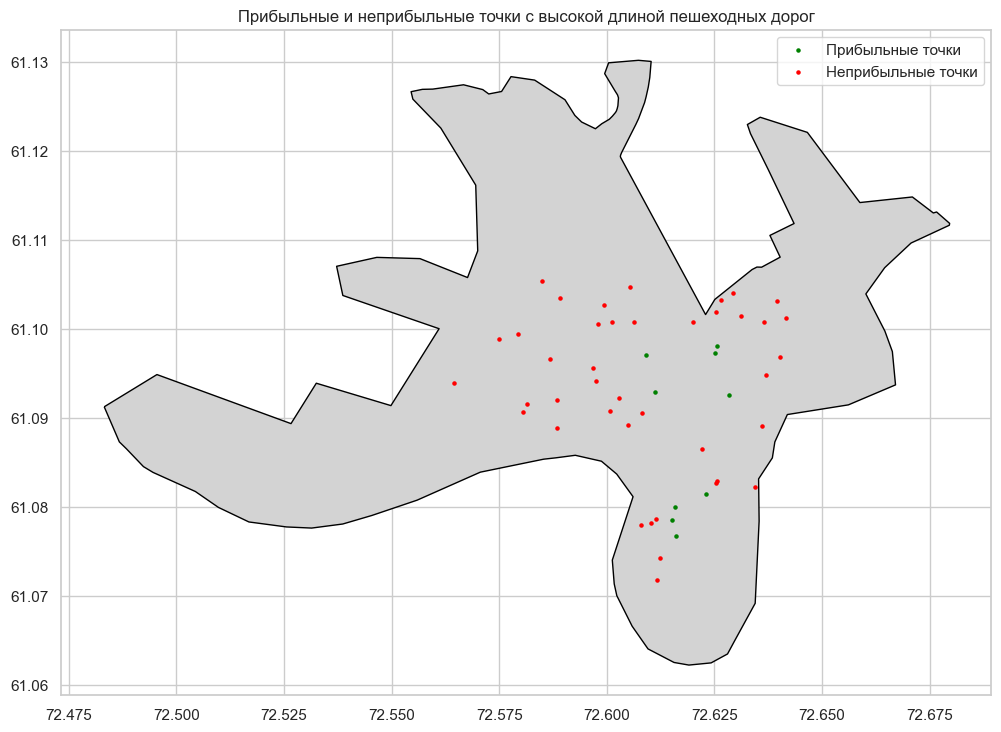

In [123]:
import geopandas as gpd
import matplotlib.pyplot as plt

random_points_gdf_utm['Population_Mean'] = random_points_gdf_utm['Population_Mean'].fillna(0)
random_points_gdf_utm['Population_Median'] = random_points_gdf_utm['Population_Median'].fillna(0)
random_points_gdf_utm['Bus_Stop_Count'] = random_points_gdf_utm['Bus_Stop_Count'].fillna(0)
random_points_gdf_utm['Parking_Count'] = random_points_gdf_utm['Parking_Count'].fillna(0)
random_points_gdf_utm['Shop_Count'] = random_points_gdf_utm['Shop_Count'].fillna(0)
random_points_gdf_utm['Residential_Count'] = random_points_gdf_utm['Residential_Count'].fillna(0)
random_points_gdf_utm['Amenity_Count'] = random_points_gdf_utm['Amenity_Count'].fillna(0)
random_points_gdf_utm['Distance_To_Competitor'] = random_points_gdf_utm['Distance_To_Competitor'].fillna(0)
random_points_gdf_utm['Distance_To_New_Building'] = random_points_gdf_utm['Distance_To_New_Building'].fillna(0)

X_random = random_points_gdf_utm[['Residential_Count', 'Auto_Highway_Length', 'Pedestrian_Highway_Length', 
                                  'Population_Mean', 'Population_Median', 'Bus_Stop_Count', 
                                  'Parking_Count', 'Shop_Count', 'Amenity_Count',
                                  'Distance_To_Competitor', 'Distance_To_New_Building']]

X_random_scaled = scaler.transform(X_random)

random_points_gdf_utm['Profit_Pred'] = model.predict(X_random_scaled)

pedestrian_median = random_points_gdf_utm['Pedestrian_Highway_Length'].median()
selected_points = random_points_gdf_utm[random_points_gdf_utm['Pedestrian_Highway_Length'] > pedestrian_median]

nefteyugansk_gdf_wgs = nefteyugansk_gdf_utm.to_crs(epsg=4326)

selected_points_wgs = selected_points.to_crs(epsg=4326)

fig, ax = plt.subplots(figsize=(12, 12))
nefteyugansk_gdf_wgs.plot(ax=ax, color='lightgrey', edgecolor='black')  # Границы города

selected_points_wgs[selected_points_wgs['Profit_Pred'] == 1].plot(ax=ax, color='green', marker='o', markersize=5, label='Прибыльные точки')
selected_points_wgs[selected_points_wgs['Profit_Pred'] == 0].plot(ax=ax, color='red', marker='o', markersize=5, label='Неприбыльные точки')

plt.title('Прибыльные и неприбыльные точки с высокой длиной пешеходных дорог')
plt.legend()
plt.show()


Возьмем только зеленые точки и исключим те, что имеют в радиусе 500 метров магазины Магнит

In [125]:
import geopandas as gpd
import matplotlib.pyplot as plt

magnit_gdf_utm = magnit_gdf.to_crs(utm_crs)

magnit_gdf_utm['buffer_500m'] = magnit_gdf_utm.geometry.buffer(500)

random_points_gdf_utm = random_points_gdf_utm.to_crs(utm_crs)

def is_outside_buffers(point, buffers):
    for buffer_geom in buffers.geometry:
        if point.within(buffer_geom):
            return False
    return True

filtered_points = random_points_gdf_utm[random_points_gdf_utm.geometry.apply(
    lambda x: is_outside_buffers(x, magnit_gdf_utm['buffer_500m'])
)]

filtered_points_wgs = filtered_points.to_crs(epsg=4326)

green_points = filtered_points_wgs[filtered_points_wgs['Profit_Pred'] == 1]

if green_points.empty:
    print("Нет подходящих точек для отображения")
else:
    if green_points.geometry.is_empty.any():
        print("Некоторые точки имеют пустую геометрию")
    
    fig, ax = plt.subplots(figsize=(12, 12))
    nefteyugansk_gdf_wgs.plot(ax=ax, color='lightgrey', edgecolor='black')

    green_points.plot(ax=ax, color='green', marker='o', markersize=5, label='Прибыльные точки вне 500м от Магнит')

    plt.title('Отфильтрованные прибыльные точки вне радиуса 500м от Магнит')
    plt.legend()
    plt.show()


Нет подходящих точек для отображения


Тот факт, что после фильтрации по буферам в радиусе 500 метров многие прибыльные "зеленые" точки оказались исключены, подтверждает предположение, что в этих местах уже есть магазины "Магнит", что, вероятно, и объясняет их прибыльность.


Заключение.

Проект показал, что доступность (пешеходные и автомобильные дороги), транспортная инфраструктура и демографические данные (плотность населения) играют значимую роль в успехе розничных магазинов. Если бы у нас были дополнительные данные, например, по покупательской способности населения, по обороту уже успешных магазинах или (с моей стороны) больше данных о конкурентах, мы могли бы провести более комплексный анализ, чтобы выявить еще больше факторов, влияющих на успех магазинов.

Как геоаналитик, этот проект был для меня отличной возможностью применить знания пространственного анализа и понять основы работы с данными. Однако я осознаю, что для дальнейшего роста в сфере Data Science мне нужно наращивать свои навыки и знания в области машинного обучения. Стать стажером по этой специальности было бы отличным шагом для меня,так как в обычной работе всё сводится к процессингу данных и классической гис-аналитике без особого умственного напряжения. Надеюсь, вам понравился мой ход мыслей)

P.S. Можно было бы прикрутить еще изохроны (транспортная доступность) и с помощью неё анализировать точки, например, с наибольшим охватом. Это бы дало более ясную и красивую картинку вместо анализа плотности путей/дорог в буффере 500 м. Можно вообще любые данные подтягивать, например со спутниковых снимков при перегонке значений в полигоны с Zonal Statistits можно поизучать на то, как освещенность влияет на прибыльность, проверить экологические факторы (вряд ли, конечно. а вдруг содержание CO влияет на продажи?). факторы рельефа (если город имеет весомые перепады высот, как в Кисловодске например) и тд и тп. Еще как идея неблагополучные факторы: близость к свалкам, гаражным кооперативам и тд. Размах большой, но я уверен, что есть уже хорошие метрики,которые показали себя эффективно.

P.S.S. Этот проект начинался без четкого понимания, каким образом можно эффективно проанализировать прибыльность магазинов и выбрать лучшие места для новых торговых точек. Однако, по мере работы над проектом, начали появляться идеи, такие как использование тегов OSM для получения данных о транспортной инфраструктуре, учреждениях и других объектах вблизи магазинов. Постепенно возникла мысль интегрировать данные о плотности населения, расстоянии до новостроек и конкурентов, чтобы сделать анализ более многогранным и приближенным к реальности. С каждой итерацией проект становился все более комплексным, и подход к анализу эволюционировал. Это стало важным шагом в понимании, как можно улучшить анализ данных, начав с простых гипотез и двигаясь к более сложным и проработанным решениям. 